<a href="https://colab.research.google.com/github/Tanvip799/Business-Analytics-with-Python/blob/main/intern_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SECTION 1: Marketing**

# **Importing the dataset**



In [135]:
!unzip "/content/drive/MyDrive/Copy of customer_transactions_sample.zip"

Archive:  /content/drive/MyDrive/Copy of customer_transactions_sample.zip
replace Copy of customer_transactions_sample.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Copy of customer_transactions_sample.xlsx  


In [136]:
#Importing required libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


#**Calculating relevant recency, frequency as well as monetary values from the dataset (excluding cancelled invoices from the dataset).**

In [137]:
import pandas as pd

df=pd.read_excel('/content/Copy of customer_transactions_sample.xlsx')

#Excluding cancelled invoices
df=df[~df['Invoice'].astype(str).str.startswith('C')]

# 1. Recency Calculation by monitoring current date and date of last invoice
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
recency_df=df.groupby('Customer ID')['InvoiceDate'].max().reset_index()
current_date=pd.to_datetime('01-09-2012 11:59')
recency_df['Recency']=(current_date - recency_df['InvoiceDate']).dt.days
recency_df.drop('InvoiceDate', axis=1, inplace=True)

# 2. Frequency Calculation by monitoring unique invoice numbers
frequency_df=df.groupby('Customer ID')['Invoice'].nunique().reset_index()
frequency_df.rename(columns={'Invoice': 'Frequency'}, inplace=True)

# 3. Monetary Calculation by calculating total amount
df['TotalAmount']=df['Quantity']*df['Price']
monetary_df=df.groupby('Customer ID')['TotalAmount'].sum().reset_index()
monetary_df.rename(columns={'TotalAmount': 'Monetary'}, inplace=True)

#merging the datasets
rfm_df=pd.merge(recency_df, frequency_df, on='Customer ID')
rfm_df=pd.merge(rfm_df, monetary_df, on='Customer ID')


print(rfm_df)
#Exporting new dataset.
rfm_df.to_excel('rfm_dataframe.xlsx', index=False)



      Customer ID  Recency  Frequency  Monetary
0         12346.0      559         11    372.86
1         12347.0      397          2   1323.32
2         12348.0      468          1    222.16
3         12349.0      438          3   2671.14
4         12351.0      405          1    300.93
...           ...      ...        ...       ...
4309      18283.0      412          6    641.77
4310      18284.0      462          1    461.68
4311      18285.0      691          1    427.00
4312      18286.0      507          2   1296.43
4313      18287.0      413          4   2345.71

[4314 rows x 4 columns]


#**Filtering columns for clustering**

In [138]:
df = pd.read_excel('/content/rfm_dataframe.xlsx')
#Selecting relevant columns
selected_columns = ['Recency', 'Frequency', 'Monetary']

df_selected = df[selected_columns]
#Save the selected columns to a new Excel file
df_selected.to_excel('new_rfm.xlsx', index=False)

#**Feature Scaling**

In [139]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled=scaler.fit_transform(df_selected)

In [140]:
scaled

array([[ 0.75737638,  0.80143595, -0.18789547],
       [-0.91372963, -0.30046398, -0.08123991],
       [-0.18133131, -0.42289731, -0.20480622],
       ...,
       [ 2.11901831, -0.42289731, -0.18182017],
       [ 0.22097198, -0.30046398, -0.08425736],
       [-0.74868212, -0.05559733,  0.03348725]])

#**Applying the Elbow Method for determining optimum number of Clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

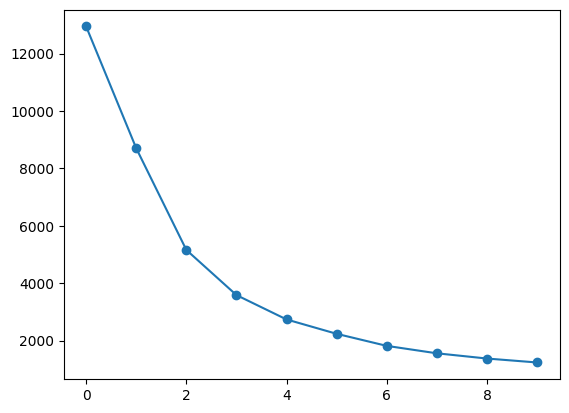

In [141]:
df = pd.read_excel('/content/rfm_dataframe.xlsx')

imputer = SimpleImputer(strategy='mean')
scaled = imputer.fit_transform(scaled)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()
plt.plot(wcss,marker="o")

#**Training the K-Means Model**

In [142]:
#We determined optimum clusters as 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [143]:
df["Clusters"]=(kmeans.labels_ +1)

In [144]:
df

,Customer ID,Recency,Frequency,Monetary,Clusters
0,12346,559,11,372.86,3
1,12347,397,2,1323.32,1
2,12348,468,1,222.16,1
3,12349,438,3,2671.14,1
4,12351,405,1,300.93,1
...,...,...,...,...,...
4309,18283,412,6,641.77,1
4310,18284,462,1,461.68,1
4311,18285,691,1,427.00,3
4312,18286,507,2,1296.43,1


#**Determining cluster groups for categorizing customers**

In [145]:
group=df.groupby(["Clusters"])[["Recency","Frequency","Monetary"]].mean()
group

,Recency,Frequency,Monetary
Clusters,,,
1,436.449150,4.946522,2084.014096
2,398.307692,111.538462,112132.389231
3,635.736398,1.653846,593.336411


#**Visualizing our results**

In [146]:
#inversing feature scaling
unscaled_data = scaler.inverse_transform(scaled)

In [147]:
unscaled_data

array([[5.59000e+02, 1.10000e+01, 3.72860e+02],
       [3.97000e+02, 2.00000e+00, 1.32332e+03],
       [4.68000e+02, 1.00000e+00, 2.22160e+02],
       ...,
       [6.91000e+02, 1.00000e+00, 4.27000e+02],
       [5.07000e+02, 2.00000e+00, 1.29643e+03],
       [4.13000e+02, 4.00000e+00, 2.34571e+03]])

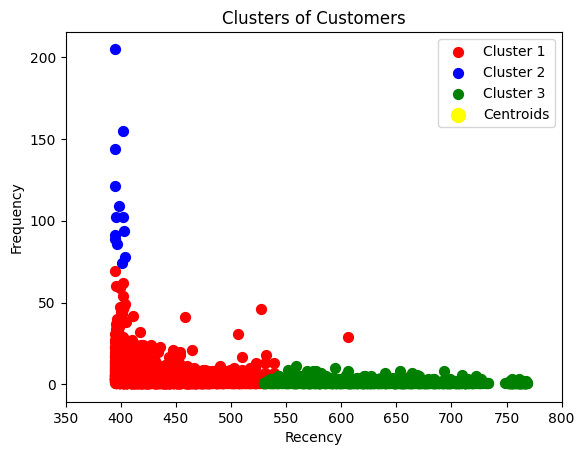

In [148]:
plt.scatter(unscaled_data[y_kmeans == 0, 0], unscaled_data[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(unscaled_data[y_kmeans == 1, 0], unscaled_data[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(unscaled_data[y_kmeans == 2, 0], unscaled_data[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')

# Plot the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.xlim(350, 800)
plt.legend()
plt.show()

Above graph shows three clusters represeting three categories of customers mainly Whales, Lapsed and Average.

#**Assigning RFM scores to determine more customer categories in detail**

In [149]:
selected_columns = ['Recency', 'Frequency', 'Monetary']

df1= df[selected_columns]
df1 = df1.apply(pd.to_numeric)


percentiles = df1.quantile([0.33, 0.66])


recency_ranges = {
    'low': (df1['Recency'].min(), percentiles.loc[0.33, 'Recency']),
    'medium': (percentiles.loc[0.33, 'Recency'], percentiles.loc[0.66, 'Recency']),
    'high': (percentiles.loc[0.66, 'Recency'], df1['Recency'].max())
}

frequency_ranges = {
    'low': (df1['Frequency'].min(), percentiles.loc[0.33, 'Frequency']),
    'medium': (percentiles.loc[0.33, 'Frequency'], percentiles.loc[0.66, 'Frequency']),
    'high': (percentiles.loc[0.66, 'Frequency'], df1['Frequency'].max())
}
monetary_ranges = {
    'low': (df1['Monetary'].min(), percentiles.loc[0.33, 'Monetary']),
    'medium': (percentiles.loc[0.33, 'Monetary'], percentiles.loc[0.66, 'Monetary']),
    'high': (percentiles.loc[0.66, 'Monetary'], df1['Monetary'].max())
}

# Assign categories based on ranges
def assign_category(value, ranges):
    if value <= ranges['low'][1]:
        return 'Low'
    elif value <= ranges['medium'][1]:
        return 'Medium'
    else:
        return 'High'

# Assign categories for each feature
df1['RecencyCategory'] = df1['Recency'].apply(lambda x: assign_category(x, recency_ranges))
df1['FrequencyCategory'] = df1['Frequency'].apply(lambda x: assign_category(x, frequency_ranges))
df1['MonetaryCategory'] = df1['Monetary'].apply(lambda x: assign_category(x, monetary_ranges))

# Display the DataFrame with categories
print(df1)


      Recency  Frequency  Monetary RecencyCategory FrequencyCategory  \
0         559         11    372.86            High              High   
1         397          2   1323.32             Low               Low   
2         468          1    222.16          Medium               Low   
3         438          3   2671.14          Medium            Medium   
4         405          1    300.93             Low               Low   
...       ...        ...       ...             ...               ...   
4309      412          6    641.77             Low              High   
4310      462          1    461.68          Medium               Low   
4311      691          1    427.00            High               Low   
4312      507          2   1296.43            High               Low   
4313      413          4   2345.71             Low            Medium   

     MonetaryCategory  
0                 Low  
1                High  
2                 Low  
3                High  
4              

In [150]:
def assign_category(recency, frequency, monetary):

    # Assign categories based on recency, frequency, and monetary values
    if recency == 'High' and frequency == 'High' and monetary == 'High':
        return 'Best Customer'
    elif recency == 'High' and frequency == 'High' and monetary == 'Medium':
        return 'Big Spenders'
    elif recency == 'High' and frequency == 'High' and monetary == 'Low':
        return 'Lost Cheap Customers'
    elif recency == 'High' and frequency == 'Medium' and monetary == 'High':
        return 'Potential to be Best'
    elif recency == 'High' and frequency == 'Medium' and monetary == 'Medium':
        return 'Look out Buyers'
    elif recency == 'High' and frequency == 'Medium' and monetary == 'Low':
        return 'Potential to be Best'
    elif recency == 'High' and frequency == 'Low' and monetary == 'High':
        return 'Loyal Customers'
    elif recency == 'High' and frequency == 'Low' and monetary == 'Medium':
        return 'Lost Cheap Customers'
    elif recency == 'High' and frequency == 'Low' and monetary == 'Low':
        return 'Lost Cheap Customers'
    elif recency == 'Medium' and frequency == 'High' and monetary == 'High':
        return 'Big Spenders'
    elif recency == 'Medium' and frequency == 'High' and monetary == 'Medium':
        return 'Potential to be Best'
    elif recency == 'Medium' and frequency == 'High' and monetary == 'Low':
        return 'Potential to be Best'
    elif recency == 'Medium' and frequency == 'Medium' and monetary == 'High':
        return 'Potential to be Best'
    elif recency == 'Medium' and frequency == 'Medium' and monetary == 'Medium':
        return 'Occasional Buyers'
    elif recency == 'Medium' and frequency == 'Medium' and monetary == 'Low':
        return 'Lost Cheap Customers'
    elif recency == 'Medium' and frequency == 'Low' and monetary == 'High':
        return 'Look out Buyers'
    elif recency == 'Medium' and frequency == 'Low' and monetary == 'Medium':
        return 'Lost Cheap Customers'
    elif recency == 'Medium' and frequency == 'Low' and monetary == 'Low':
        return 'Lost Cheap Customers'
    elif recency == 'Low' and frequency == 'High' and monetary == 'High':
        return 'Loyal Customers'
    elif recency == 'Low' and frequency == 'High' and monetary == 'Medium':
        return 'Potential to be Best'
    elif recency == 'Low' and frequency == 'High' and monetary == 'Low':
        return 'Potential to be Best'
    elif recency == 'Low' and frequency == 'Medium' and monetary == 'High':
        return 'Potential to be Best'
    elif recency == 'Low' and frequency == 'Medium' and monetary == 'Medium':
        return 'Occasional Buyers'
    elif recency == 'Low' and frequency == 'Medium' and monetary == 'Low':
        return 'Lost Cheap Customers'
    elif recency == 'Low' and frequency == 'Low' and monetary == 'High':
        return 'Lost Cheap Customers'
    elif recency == 'Low' and frequency == 'Low' and monetary == 'Medium':
        return 'Lost Cheap Customers'
    elif recency == 'Low' and frequency == 'Low' and monetary == 'Low':
        return 'Lost Cheap Customers'
    else:
        return 'Uncategorized'

# Apply the function to each row of the DataFrame
df1['Category'] = df1.apply(lambda row: assign_category(row['RecencyCategory'], row['FrequencyCategory'], row['MonetaryCategory']), axis=1)


KeyError: "['Segment'] not found in axis"

#**Shows the complete dataframe with clusters as well as customer categories**

In [153]:
result = pd.concat([df, df1], axis=1)
result = result.loc[:, ~result.columns.duplicated()]
result

,Customer ID,Recency,Frequency,Monetary,Clusters,RecencyCategory,FrequencyCategory,MonetaryCategory,Category
0,12346,559,11,372.86,3,High,High,Low,Lost Cheap Customers
1,12347,397,2,1323.32,1,Low,Low,High,Lost Cheap Customers
2,12348,468,1,222.16,1,Medium,Low,Low,Lost Cheap Customers
3,12349,438,3,2671.14,1,Medium,Medium,High,Potential to be Best
4,12351,405,1,300.93,1,Low,Low,Low,Lost Cheap Customers
...,...,...,...,...,...,...,...,...,...
4309,18283,412,6,641.77,1,Low,High,Medium,Potential to be Best
4310,18284,462,1,461.68,1,Medium,Low,Medium,Lost Cheap Customers
4311,18285,691,1,427.00,3,High,Low,Medium,Lost Cheap Customers
4312,18286,507,2,1296.43,1,High,Low,High,Loyal Customers


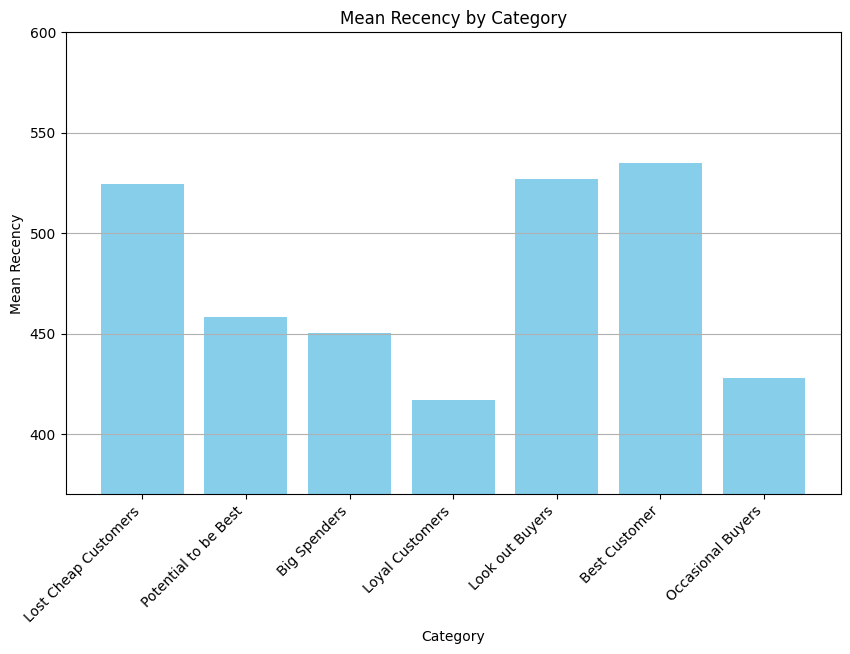

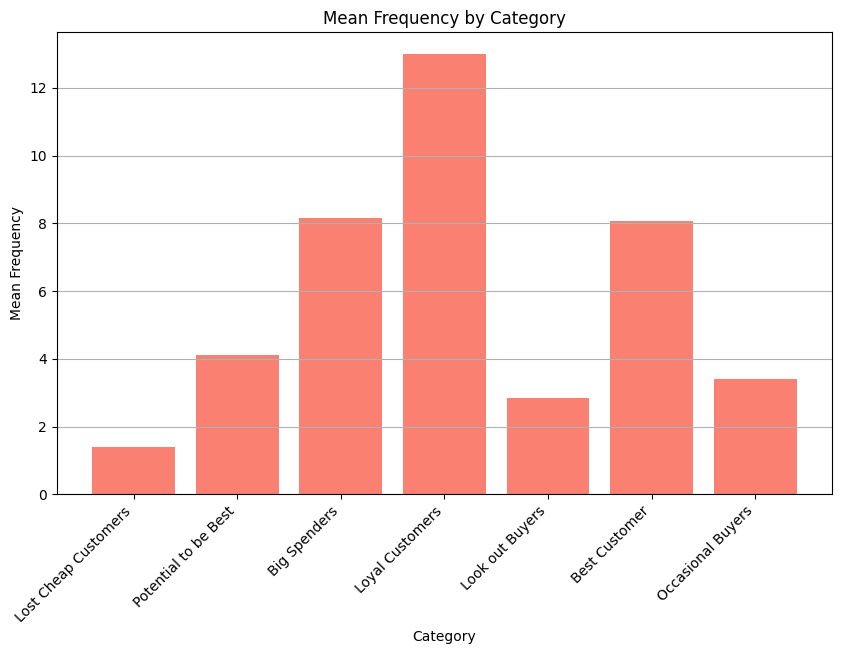

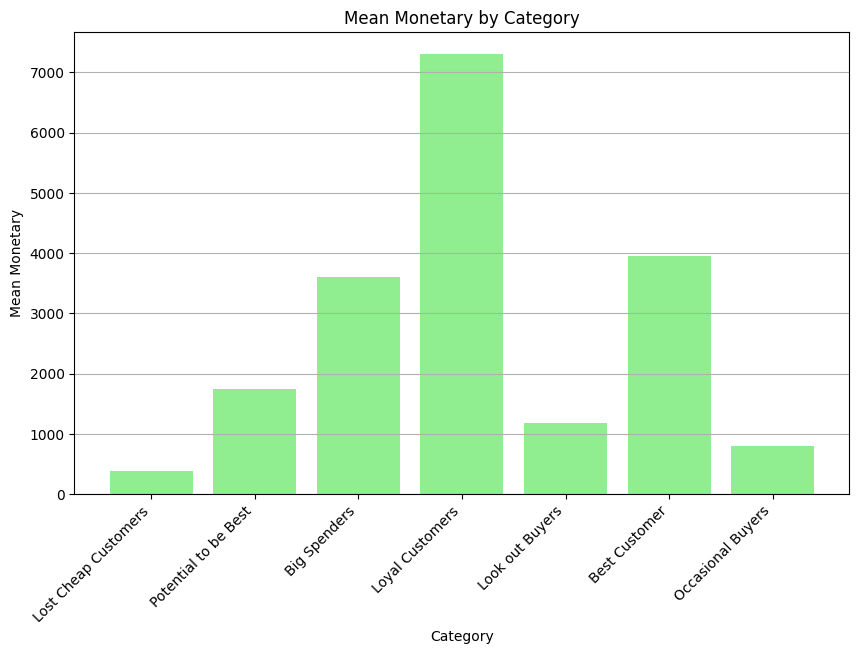

In [154]:
import pandas as pd
import matplotlib.pyplot as plt



mean_recency = []
mean_frequency = []
mean_monetary = []

for category in result['Category'].unique():
    category_df = result[result['Category'] == category]


    mean_recency.append(category_df['Recency'].mean())
    mean_frequency.append(category_df['Frequency'].mean())
    mean_monetary.append(category_df['Monetary'].mean())


plt.figure(figsize=(10, 6))
plt.bar(result['Category'].unique(), mean_recency, color='skyblue')
plt.title('Mean Recency by Category')
plt.xlabel('Category')
plt.ylabel('Mean Recency')
plt.ylim(370, 600)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(result['Category'].unique(), mean_frequency, color='salmon')
plt.title('Mean Frequency by Category')
plt.xlabel('Category')
plt.ylabel('Mean Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(result['Category'].unique(), mean_monetary, color='lightgreen')
plt.title('Mean Monetary by Category')
plt.xlabel('Category')
plt.ylabel('Mean Monetary')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

I would like to point out the value of big spenders coming to be low in the monetary as The monetary values for the "Big Spenders" category in the dataset is lower on average compared to other categories.

There are outliers in the monetary values for the "Big Spenders" category that are significantly lower, pulling down the mean.

#**SECTION 2: Operation team**

In [155]:
df = pd.read_excel('/content/Copy of customer_transactions_sample.xlsx')

#Convert to datetime type object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Here we group by dail level sales
daily_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Quantity'].sum().reset_index()


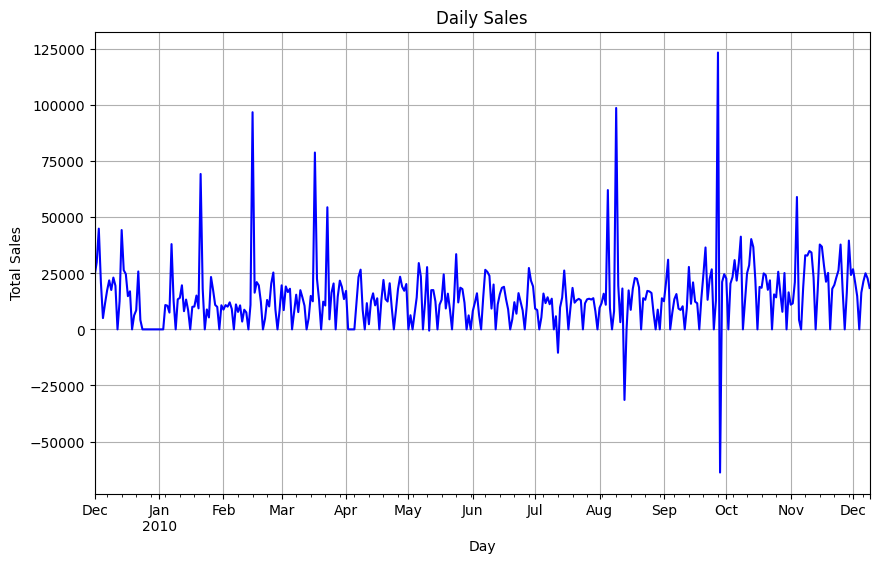

In [156]:
#Plot
import matplotlib.pyplot as plt


daily_sales_by_day = daily_sales.groupby('InvoiceDate')['Quantity'].sum()

plt.figure(figsize=(10, 6))
daily_sales_by_day.plot(kind='line', color='blue')
plt.title('Daily Sales')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [157]:
daily_sales

,InvoiceDate,Quantity
0,2009-12-01,24022
1,2009-12-02,29942
2,2009-12-03,44896
3,2009-12-04,21001
4,2009-12-05,5033
...,...,...
369,2010-12-05,16395
370,2010-12-06,21419
371,2010-12-07,24995
372,2010-12-08,22741


#**Building the model for predictions of sales.**

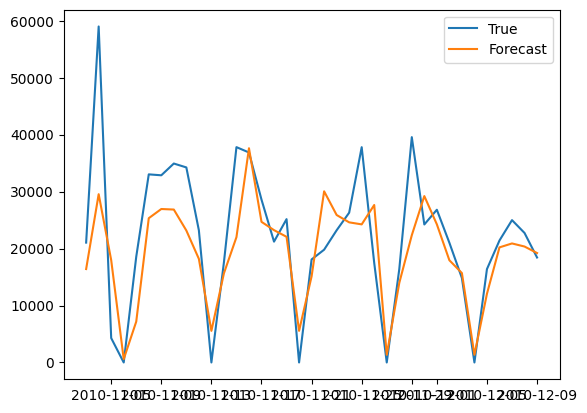

In [158]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

daily_sales['InvoiceDate'] = pd.to_datetime(daily_sales['InvoiceDate'])

# Create lagged features. Here we used lagged features of 7 days
for i in range(1, 8):
    daily_sales[f'Quantity_lag_{i}'] = daily_sales['Quantity'].shift(i)

daily_sales.dropna(inplace=True)

# Split data into train and test sets
train_size = int(len(daily_sales) * 0.9)
train, test = daily_sales[:train_size], daily_sales[train_size:]
scaler = StandardScaler()

X_train, y_train = train.drop(columns=['InvoiceDate', 'Quantity']), train['Quantity']
X_test, y_test = test.drop(columns=['InvoiceDate', 'Quantity']), test['Quantity']
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Random Forest model
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train_scaled, y_train)

# Forecast
forecast = model.predict(X_test_scaled)


plt.plot(test['InvoiceDate'], test['Quantity'], label='True')
plt.plot(test['InvoiceDate'], forecast, label='Forecast')
plt.legend()
plt.show()


In [159]:
#This is what our testing data with lagged features looks like.
X_test

,Quantity_lag_1,Quantity_lag_2,Quantity_lag_3,Quantity_lag_4,Quantity_lag_5,Quantity_lag_6,Quantity_lag_7
337,11575.0,11009.0,16503.0,0.0,25109.0,7836.0,16223.0
338,21046.0,11575.0,11009.0,16503.0,0.0,25109.0,7836.0
339,58995.0,21046.0,11575.0,11009.0,16503.0,0.0,25109.0
340,4283.0,58995.0,21046.0,11575.0,11009.0,16503.0,0.0
341,0.0,4283.0,58995.0,21046.0,11575.0,11009.0,16503.0
342,18571.0,0.0,4283.0,58995.0,21046.0,11575.0,11009.0
343,33029.0,18571.0,0.0,4283.0,58995.0,21046.0,11575.0
344,32866.0,33029.0,18571.0,0.0,4283.0,58995.0,21046.0
345,34931.0,32866.0,33029.0,18571.0,0.0,4283.0,58995.0
346,34247.0,34931.0,32866.0,33029.0,18571.0,0.0,4283.0


#**Future Sales Predictions using pre-existing model**

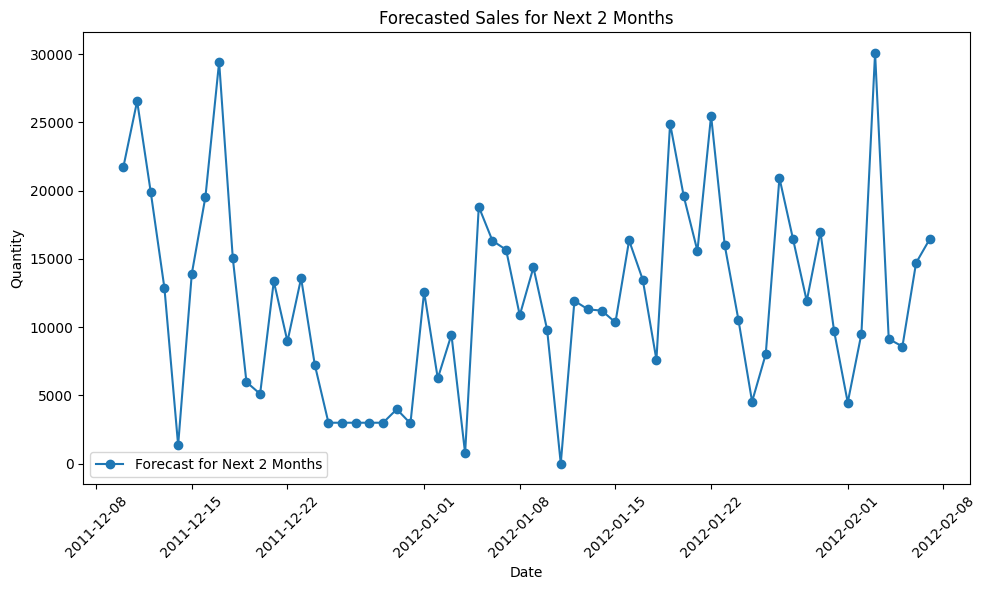

In [160]:
# Choose this date as it is the last Date of the dataset
start_date = pd.to_datetime('2011-12-09')

# Number of future days to predict which is in our case 2 months
num_future_days = 60
future_dates = pd.date_range(start=start_date + pd.Timedelta(days=1), periods=num_future_days, freq='D')

# Prepare lagged features for the generated dates
future_X = pd.DataFrame(index=future_dates, columns=X_train.columns)
for i in range(1, 8):
    future_X[f'Quantity_lag_{i}'] = daily_sales['Quantity'].shift(-i).values[:len(future_X)]
future_X_scaled = scaler.transform(future_X)

# Predict the sales values for the next 2 months
future_forecast = model.predict(future_X_scaled)


plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_forecast, label='Forecast for Next 2 Months', marker='o')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Forecasted Sales for Next 2 Months')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




#**Tabulating Predicted Data for reference**

In [161]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})
print(forecast_df)

         Date      Forecast
0  2011-12-10  21763.900000
1  2011-12-11  26560.400000
2  2011-12-12  19864.500000
3  2011-12-13  12838.900000
4  2011-12-14   1345.000000
5  2011-12-15  13908.800000
6  2011-12-16  19560.300000
7  2011-12-17  29439.500000
8  2011-12-18  15056.900000
9  2011-12-19   5971.300000
10 2011-12-20   5104.153333
11 2011-12-21  13354.900000
12 2011-12-22   8948.700000
13 2011-12-23  13582.380000
14 2011-12-24   7242.220000
15 2011-12-25   2991.431111
16 2011-12-26   2991.431111
17 2011-12-27   2991.431111
18 2011-12-28   2991.431111
19 2011-12-29   2991.431111
20 2011-12-30   3981.200000
21 2011-12-31   2939.800000
22 2012-01-01  12592.200000
23 2012-01-02   6240.800000
24 2012-01-03   9440.000000
25 2012-01-04    749.600000
26 2012-01-05  18823.500000
27 2012-01-06  16330.500000
28 2012-01-07  15667.000000
29 2012-01-08  10864.900000
30 2012-01-09  14375.600000
31 2012-01-10   9819.300000
32 2012-01-11      0.000000
33 2012-01-12  11923.400000
34 2012-01-13  11296

#**Section 3: Retail products team**

In [162]:


df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')



In [163]:
selected_columns = ['InvoiceDate', 'Quantity']

df_selected = df[selected_columns]

#**Time series forecast analysis to handle the elements of time series forecasting such as seasonality.**

In [164]:

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [165]:
df_filtered = df_selected[df_selected['Quantity'] > 0]

# Multiplicative Decomposition
mul_result = seasonal_decompose(df_filtered['Quantity'], model='multiplicative', period=1)

# Additive Decomposition
add_result = seasonal_decompose(df_filtered['Quantity'], model='additive', period=1)

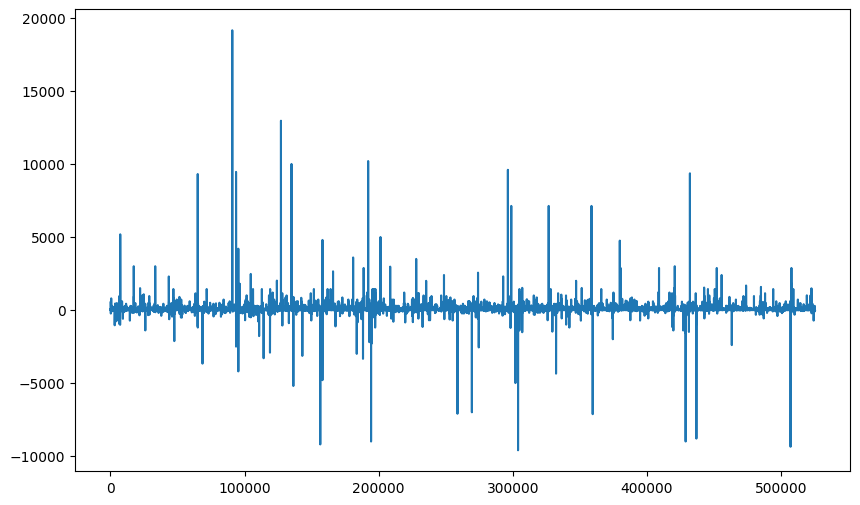

In [166]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(df_selected['Quantity'])

Text(0.5, 0.98, '\nMultiplicative Decompose')

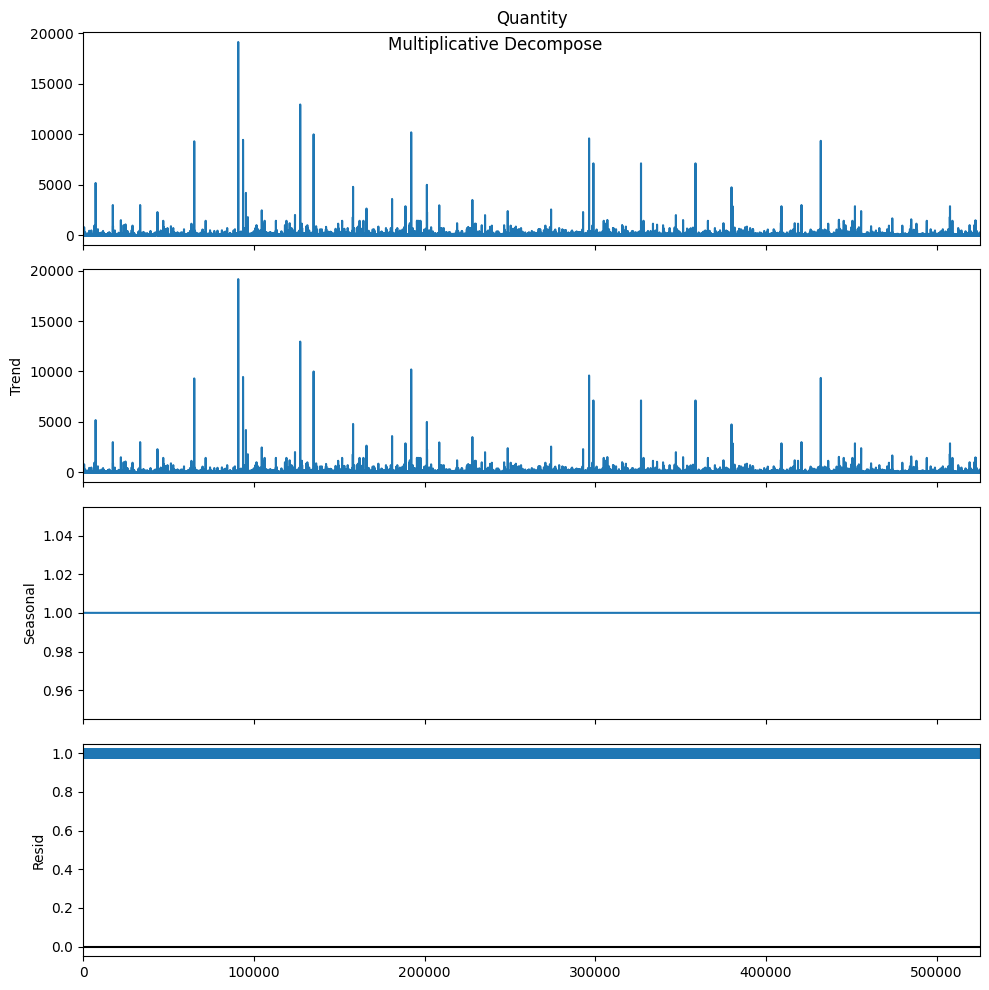

In [167]:
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)


Text(0.5, 0.98, '\nAdditive Decompose')

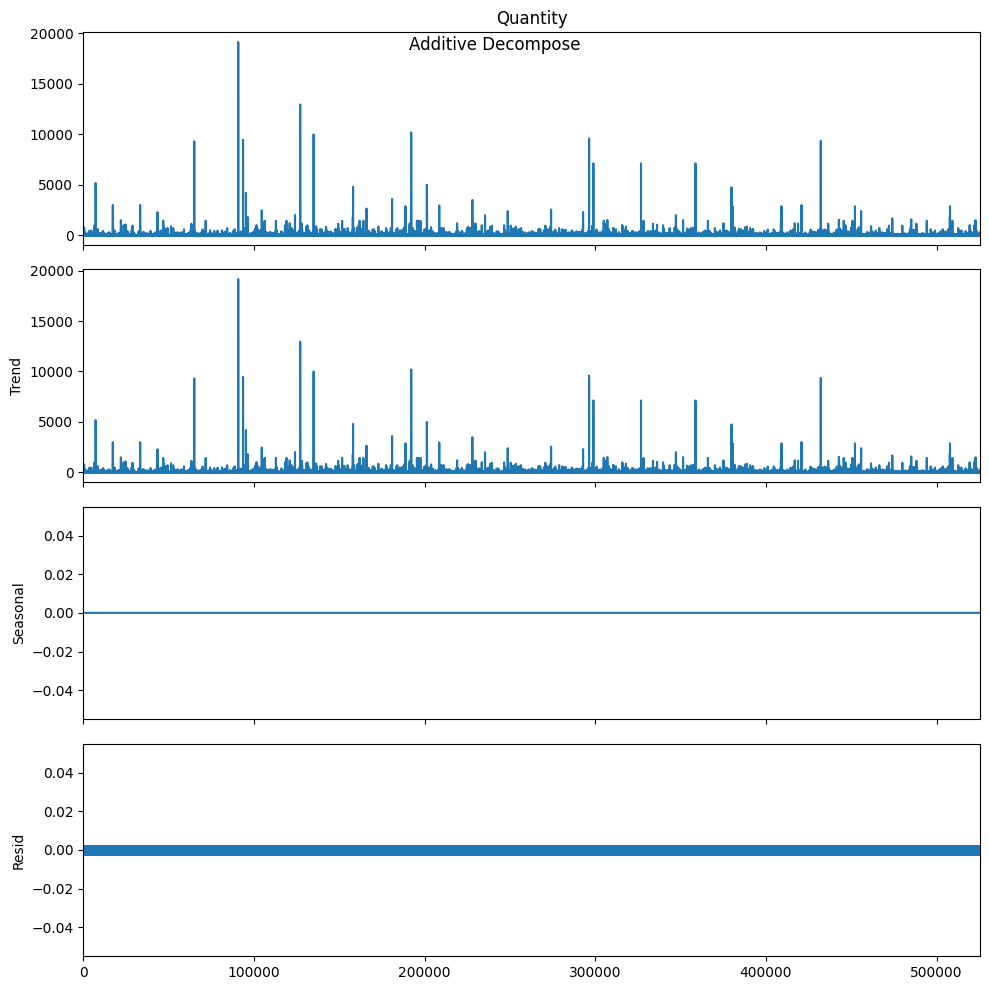

In [168]:
plt.rcParams.update({'figure.figsize': (10,10)})
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

#**Tabulating the results**

In [169]:

new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
0,0.0,12.0,0.0,12.0
1,0.0,12.0,0.0,12.0
2,0.0,12.0,0.0,12.0
3,0.0,48.0,0.0,48.0
4,0.0,24.0,0.0,24.0


In [170]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
0,1.0,12.0,1.0,12.0
1,1.0,12.0,1.0,12.0
2,1.0,12.0,1.0,12.0
3,1.0,48.0,1.0,48.0
4,1.0,24.0,1.0,24.0


#**Performing recommendations based on:**
**1.**   **Country**

**2.**   **Top 10 selling items**





In [171]:
import pandas as pd

myretaildata=pd.read_excel('/content/Copy of customer_transactions_sample.xlsx')

In [172]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [173]:
#Data Cleaning
myretaildata['Description'] = myretaildata['Description'].str.strip() #removes spaces from beginning and end
myretaildata.dropna(axis=0, subset=['Invoice'], inplace=True) #removes duplicate invoice
myretaildata['Invoice'] = myretaildata['Invoice'].astype('str') #converting invoice number to be string
myretaildata = myretaildata[~myretaildata['Invoice'].str.contains('C')] #remove the credit transactions
myretaildata.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [174]:
myretaildata['Country'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country
United Kingdom          477058
EIRE                      9460
Germany                   7661
France                    5532
Netherlands               2730
Spain                     1235
Switzerland               1170
Portugal                  1061
Belgium                   1038
Sweden                     887
Channel Islands            821
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Hong Kong                   74


In [175]:
#Creating a basket based on random country Germany
mybasket = (myretaildata[myretaildata['Country'] =="Germany"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [178]:
my_basket_sets['60 TEATIME FAIRY CAKE CASES'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [179]:
my_basket_sets['PACK OF 72 RETRO SPOT CAKE CASES'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


30

In [180]:
my_rules[ (my_rules['lift'] >= 2) &
       (my_rules['confidence'] >= 0.1) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
38,(RED SPOTTY BOWL),(RED SPOTTY CUP),0.089337,0.129683,0.072046,0.806452,6.218638,0.060461,4.496638,0.921519
39,(RED SPOTTY CUP),(RED SPOTTY BOWL),0.129683,0.089337,0.072046,0.555556,6.218638,0.060461,2.048991,0.964238
42,(RED TOADSTOOL LED NIGHT LIGHT),(WOODLAND CHARLOTTE BAG),0.178674,0.216138,0.080692,0.451613,2.089462,0.042073,1.429395,0.634837
43,(WOODLAND CHARLOTTE BAG),(RED TOADSTOOL LED NIGHT LIGHT),0.216138,0.178674,0.080692,0.373333,2.089462,0.042073,1.310626,0.665179
44,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.187320,0.285303,0.146974,0.784615,2.750117,0.093531,3.318238,0.783062
45,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.285303,0.187320,0.146974,0.515152,2.750117,0.093531,1.676153,0.890417
50,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.175793,0.285303,0.135447,0.770492,2.700613,0.085293,3.114039,0.764023
51,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND)",(ROUND SNACK BOXES SET OF 4 FRUITS),0.262248,0.187320,0.135447,0.516484,2.757227,0.086322,1.680770,0.863863
54,(ROUND SNACK BOXES SET OF 4 FRUITS),"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND)",0.187320,0.262248,0.135447,0.723077,2.757227,0.086322,2.664105,0.784216
55,(ROUND SNACK BOXES SET OF4 WOODLAND),"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",0.285303,0.175793,0.135447,0.474747,2.700613,0.085293,1.569164,0.881091


#**Top 10 selling products**

In [181]:

product_quantities = myretaildata.groupby('Description')['Quantity'].sum()
top_10_products = product_quantities.sort_values(ascending=False).head(10)
basket_top_10 = myretaildata[myretaildata['Description'].isin(top_10_products.index)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
import pandas as pd

# Filter retail data to include only transactions containing the top 100 products
filtered_data_top_10 = myretaildata[myretaildata['Description'].isin(top_10_products.index)]
basket_data_top_10 = filtered_data_top_10.groupby('Invoice')['Description'].apply(list)

abi_counts = {}
for products in basket_data_top_10:
    for i, product1 in enumerate(products):
        for j, product2 in enumerate(products):
            if i != j:
                pair = tuple(sorted([product1, product2]))
                abi_counts[pair] = abi_counts.get(pair, 0) + 1

# Calculate ABI index for each pair of products
abi_index = pd.DataFrame(index=top_10_products.index, columns=top_10_products.index)
for product1 in top_10_products.index:
    for product2 in top_10_products.index:
        pair = tuple(sorted([product1, product2]))
        if pair in abi_counts:
            abi_index.loc[product1, product2] = abi_counts[pair] / len(basket_data_top_10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**ABI Analysis**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


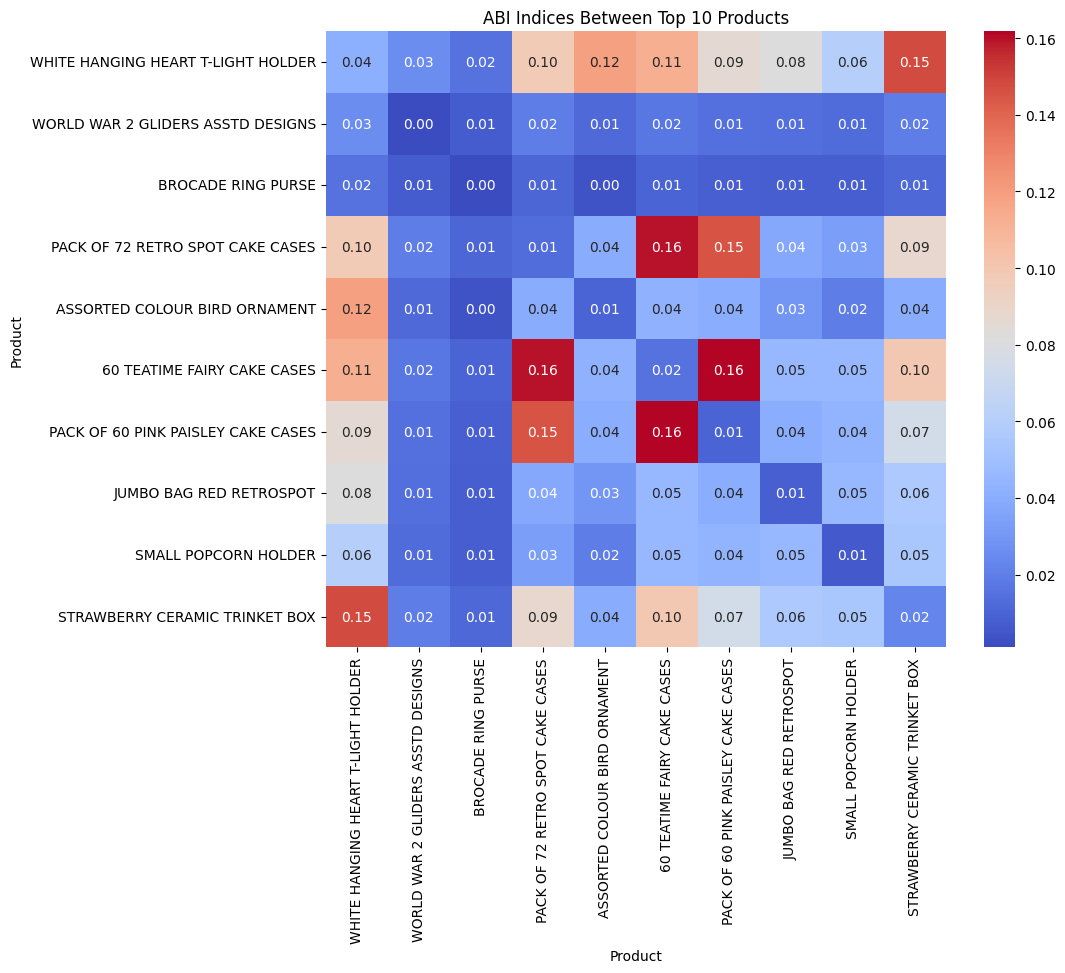

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(abi_index.astype(float), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('ABI Indices Between Top 10 Products')
plt.xlabel('Product')
plt.ylabel('Product')
plt.show()

#**Visualizing data with a network Graph**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


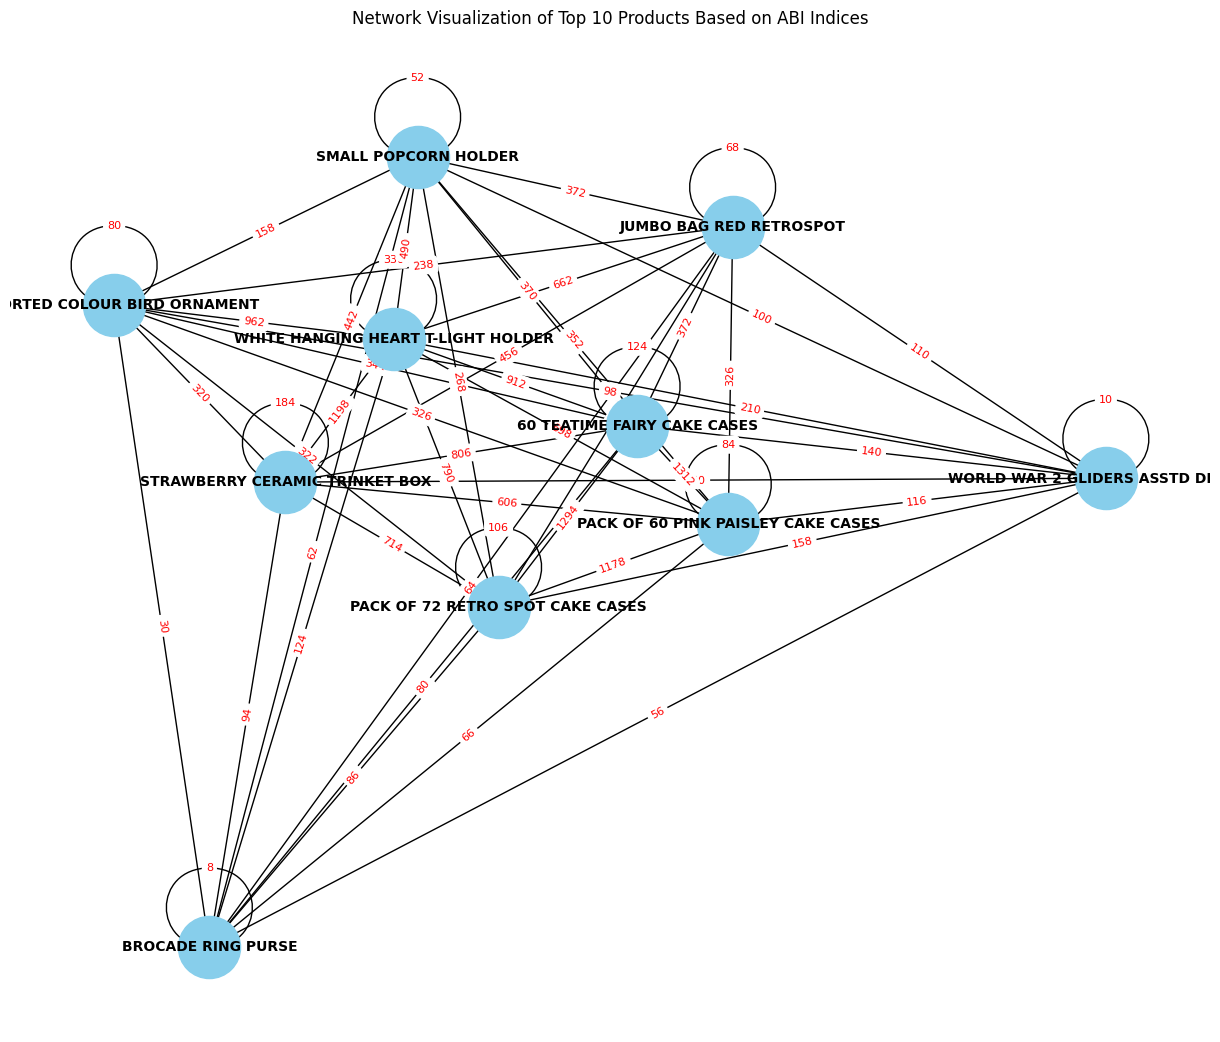

In [186]:
import networkx as nx
G = nx.Graph()

for product in top_10_products.index:
    G.add_node(product)
for pair, count in abi_counts.items():
    product1, product2 = pair
    if G.has_edge(product1, product2):
        G[product1][product2]['weight'] += count
    else:

        G.add_edge(product1, product2, weight=count)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=8)
plt.title('Network Visualization of Top 10 Products Based on ABI Indices')
plt.show()

In [187]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

basket = (myretaildata.groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
product_quantities = basket.sum()

# Sort products by total sales quantity and select the top 10 products
top_10_products = product_quantities.sort_values(ascending=False).head(10)
basket_top_10 = basket[top_10_products.index]

basket_sets = basket_top_10.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

filtered_rules = rules[(rules['lift'] > 0.1) & (rules['confidence'] > 0.1)]

#Generating cross-selling recommendations for top 10 products
def get_recommendations(product_description):
    recommendations = filtered_rules[filtered_rules['antecedents'] == {product_description}]
    recommendations = recommendations.sort_values(by='lift', ascending=False).head(5)
    return recommendations['consequents']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#**Get recommendations**

In [188]:
product_description = "PACK OF 72 RETRO SPOT CAKE CASES"
print("Cross-sell recommendations for", product_description, ":")
print(get_recommendations(product_description))

product_description = "STRAWBERRY CERAMIC TRINKET BOX"
print("Cross-sell recommendations for", product_description, ":")
print(get_recommendations(product_description))


Cross-sell recommendations for PACK OF 72 RETRO SPOT CAKE CASES :
31    (PACK OF 60 PINK PAISLEY CAKE CASES, 60 TEATIM...
17                 (PACK OF 60 PINK PAISLEY CAKE CASES)
15                        (60 TEATIME FAIRY CAKE CASES)
19                     (STRAWBERRY CERAMIC TRINKET BOX)
1                  (WHITE HANGING HEART T-LIGHT HOLDER)
Name: consequents, dtype: object
Cross-sell recommendations for STRAWBERRY CERAMIC TRINKET BOX :
22           (60 TEATIME FAIRY CAKE CASES)
24    (PACK OF 60 PINK PAISLEY CAKE CASES)
18      (PACK OF 72 RETRO SPOT CAKE CASES)
12    (WHITE HANGING HEART T-LIGHT HOLDER)
Name: consequents, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Section 4: Customer relationship management**

In [189]:
import pandas as pd

# Load the dataset
file_path="/content/Copy of customer_transactions_sample.xlsx"
sheet1_data = pd.read_excel(file_path, sheet_name='Year 2009-2010')
sheet2_data = pd.read_excel(file_path, sheet_name='Year 2010-2011')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Feature Engineering**

In [190]:
import pandas as pd


sheet1_data['Year'] = sheet1_data['InvoiceDate'].dt.year
sheet2_data['Year'] = sheet2_data['InvoiceDate'].dt.year
sheet1_data['Month'] = sheet1_data['InvoiceDate'].dt.month
sheet2_data['Month'] = sheet2_data['InvoiceDate'].dt.month

df_2009_2010 = sheet1_data[sheet1_data['Year'].isin([2010])]
df_2010_2011 = sheet2_data[sheet2_data['Year'].isin([2011])]

total_customers_2009_2010 = df_2009_2010.groupby(['Country', 'Year', 'Month']).agg({'Customer ID': 'nunique'}).reset_index()
total_customers_2009_2010.columns = ['Country', 'Year', 'Month', 'Total_Customers']

total_customers_2010_2011 = df_2010_2011.groupby(['Country', 'Year', 'Month']).agg({'Customer ID': 'nunique'}).reset_index()
total_customers_2010_2011.columns = ['Country', 'Year', 'Month', 'Total_Customers']


print("Total Customers for 2009-2010:")
print(total_customers_2009_2010)
total_customers_2009_2010.to_excel('1.xlsx',index=False)

print("\nTotal Customers for 2010-2011:")
print(total_customers_2010_2011)
total_customers_2010_2011.to_excel('2.xlsx',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total Customers for 2009-2010:
         Country  Year  Month  Total_Customers
0      Australia  2010      2                3
1      Australia  2010      3                2
2      Australia  2010      4                2
3      Australia  2010      5                4
4      Australia  2010      6                3
..           ...   ...    ...              ...
269  Unspecified  2010      4                1
270  Unspecified  2010      7                1
271  Unspecified  2010      9                2
272  Unspecified  2010     11                1
273  West Indies  2010      8                1

[274 rows x 4 columns]

Total Customers for 2010-2011:
         Country  Year  Month  Total_Customers
0      Australia  2011      1                7
1      Australia  2011      2                4
2      Australia  2011      3                3
3      Australia  2011      4                3
4      Australia  2011      5                2
..           ...   ...    ...              ...
285  Unspecified  20

In [191]:
combined_df1 = pd.concat([total_customers_2009_2010, total_customers_2010_2011], ignore_index=True)

# Display the combined DataFrame
print("Combined DataFrame:")
print(combined_df1)

Combined DataFrame:
         Country  Year  Month  Total_Customers
0      Australia  2010      2                3
1      Australia  2010      3                2
2      Australia  2010      4                2
3      Australia  2010      5                4
4      Australia  2010      6                3
..           ...   ...    ...              ...
559  Unspecified  2011      6                1
560  Unspecified  2011      7                2
561  Unspecified  2011      8                2
562  Unspecified  2011      9                0
563  Unspecified  2011     11                0

[564 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
combined_df1['Churn_Rate'] = combined_df1.groupby(['Country', 'Year'])['Total_Customers'].transform(lambda x: x.diff()/-x.shift())

combined_df1.dropna(subset=['Churn_Rate'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [197]:
combined_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Actual Churn,Predicted Churn
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
4154,0,0
4155,0,0
4156,0,0
4157,0,0


#**Plotting the results**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


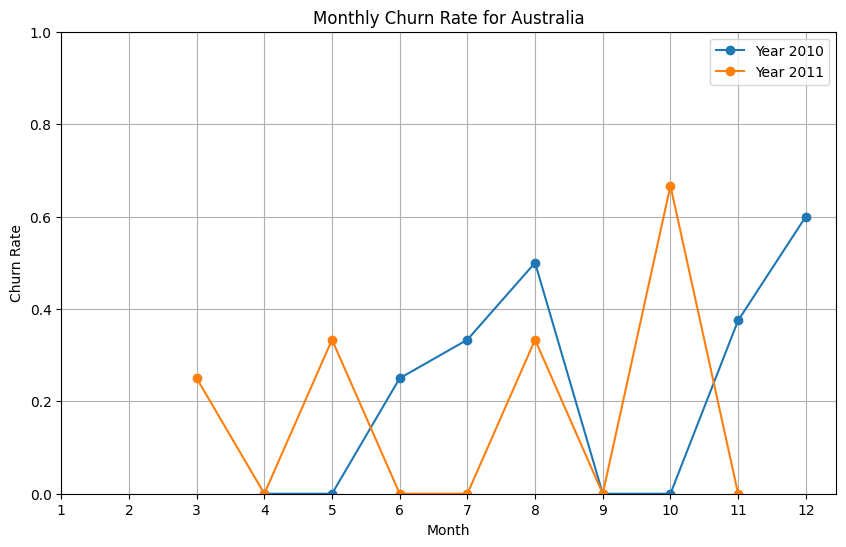

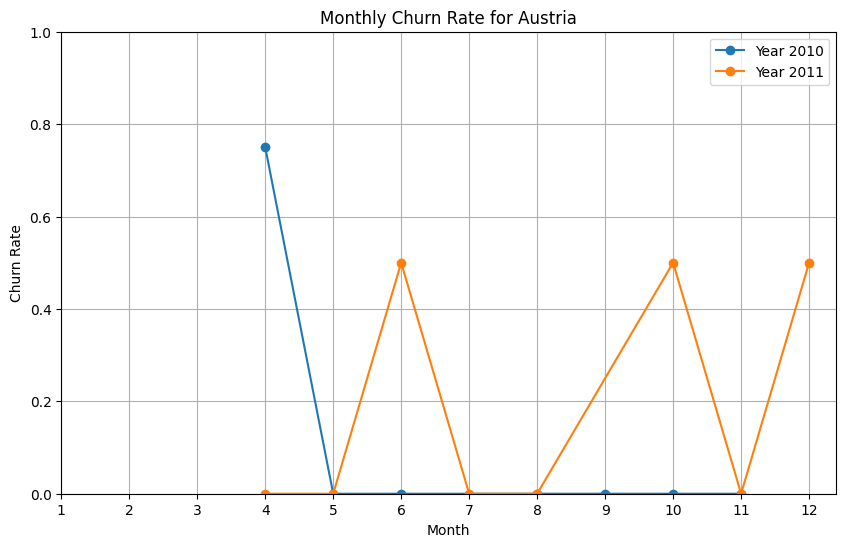

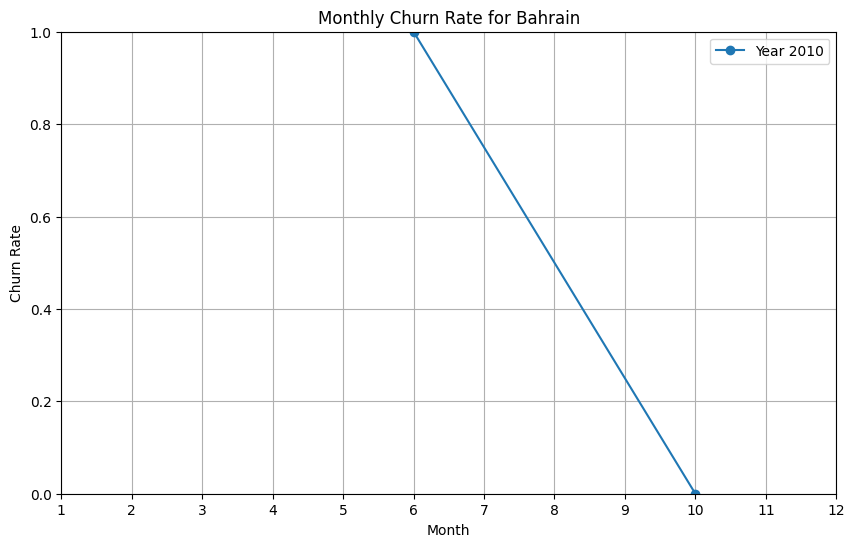

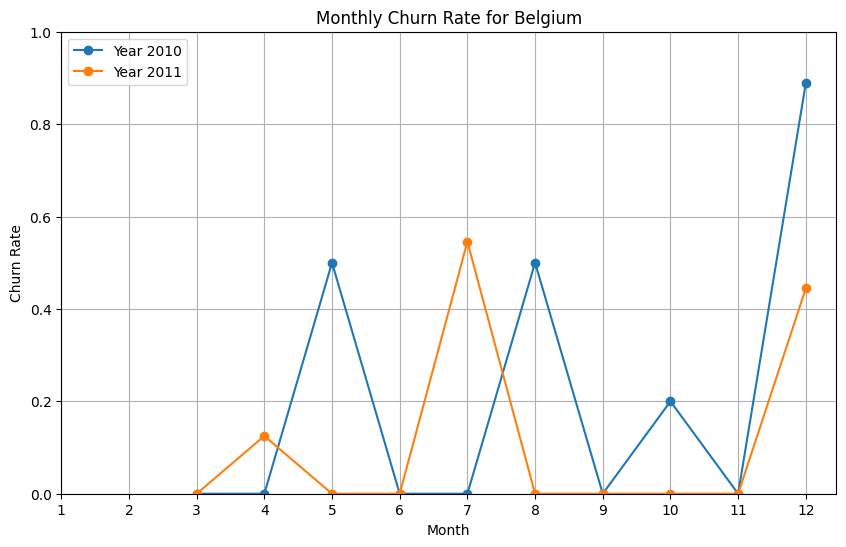

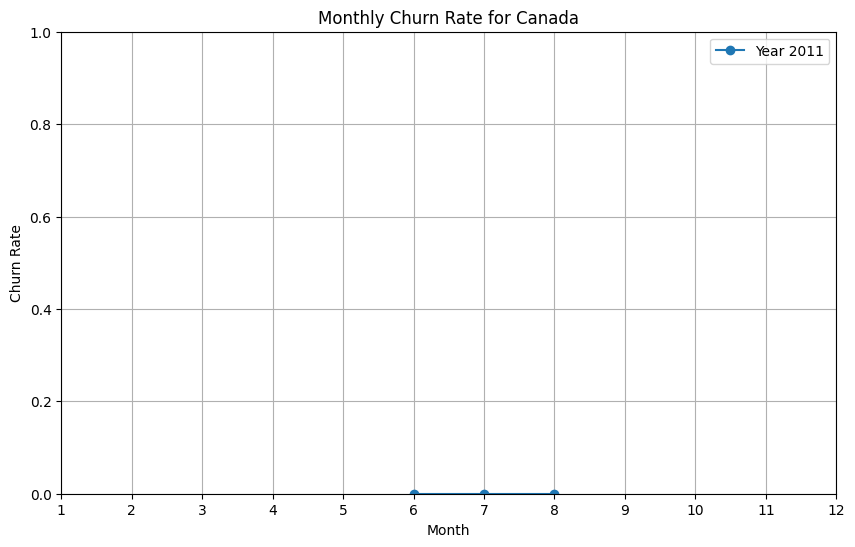

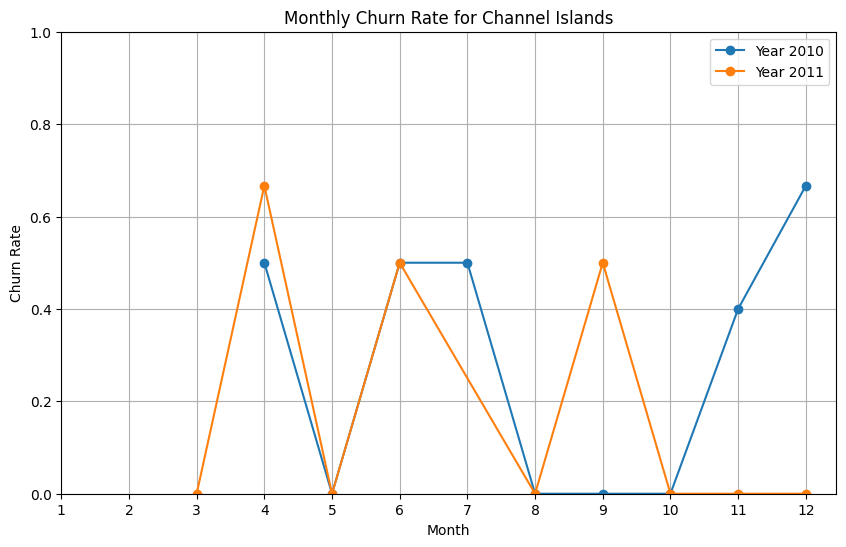

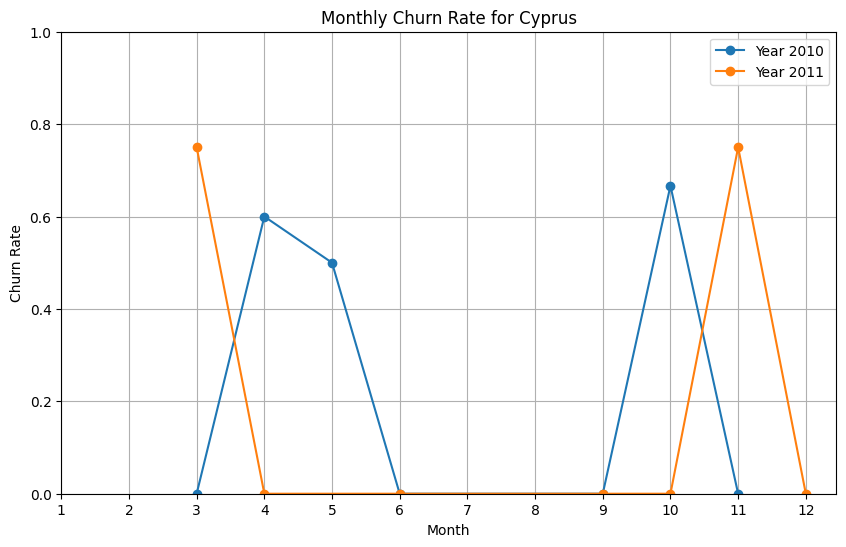

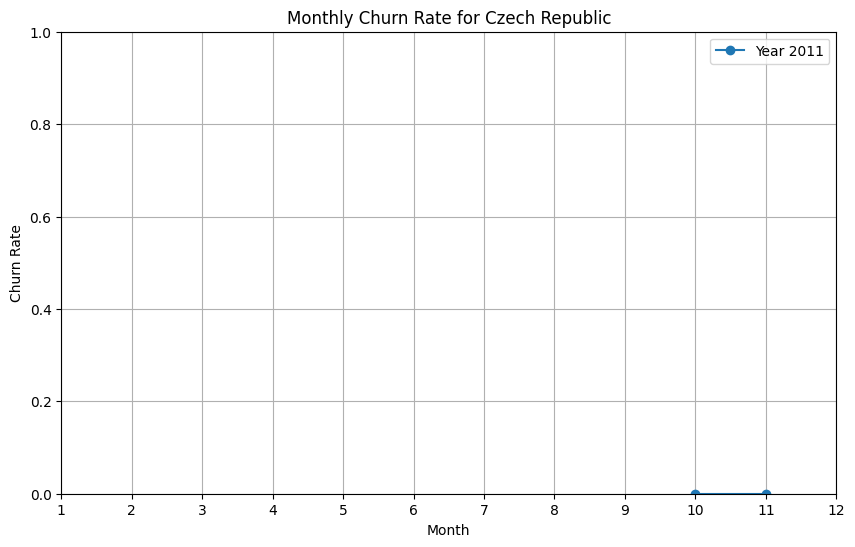

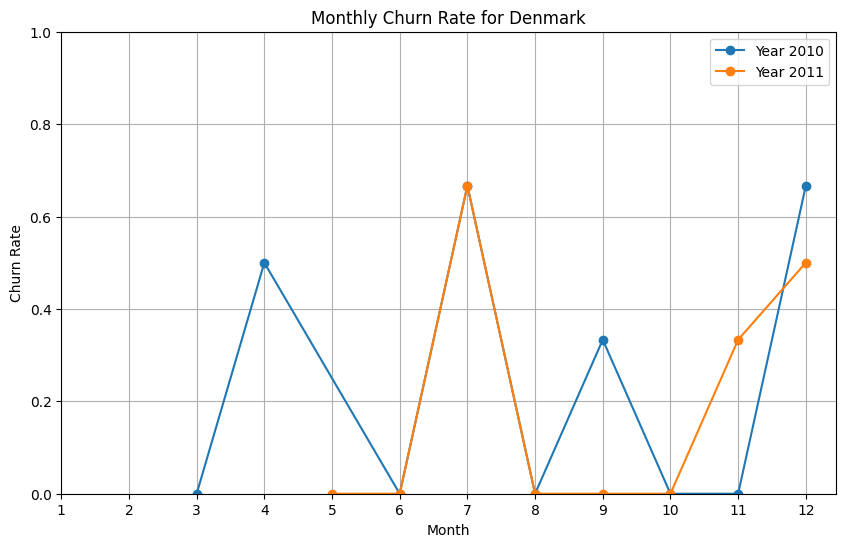

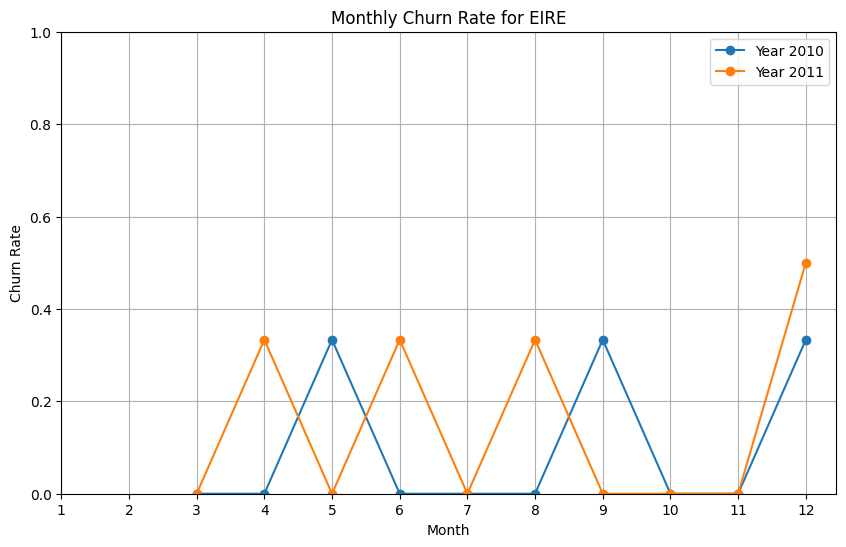

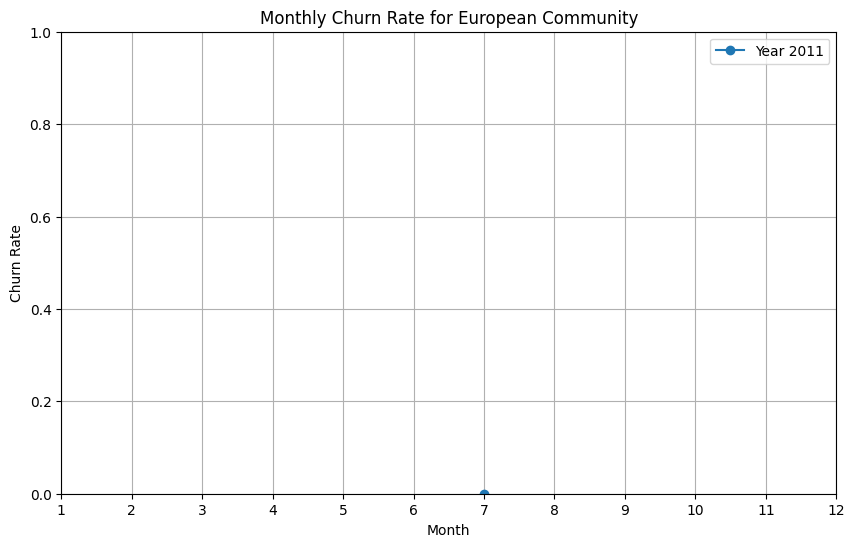

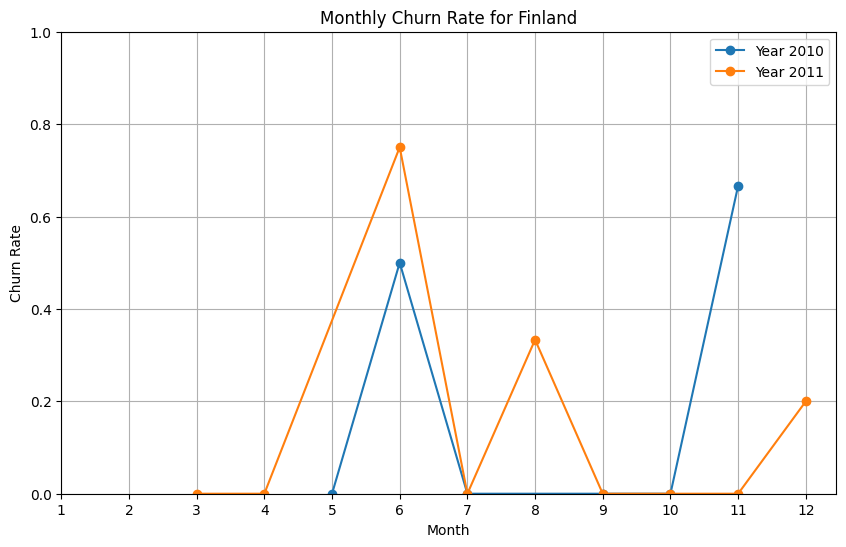

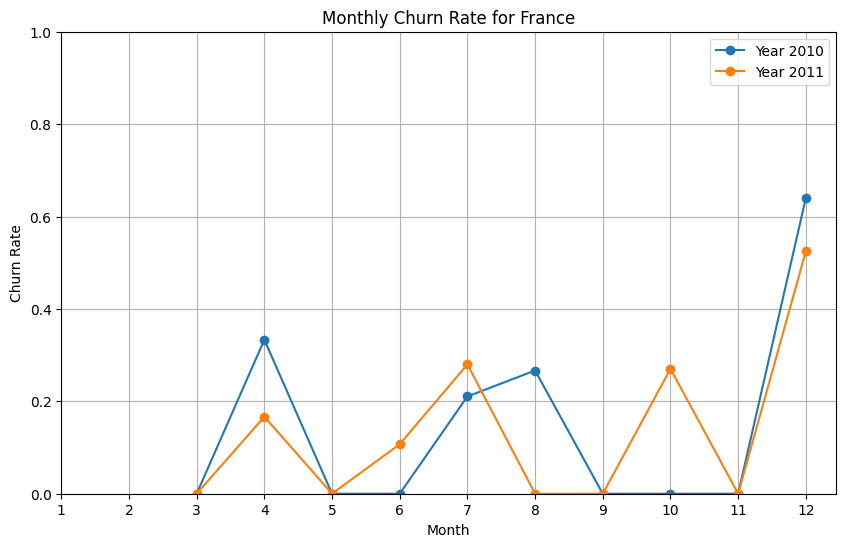

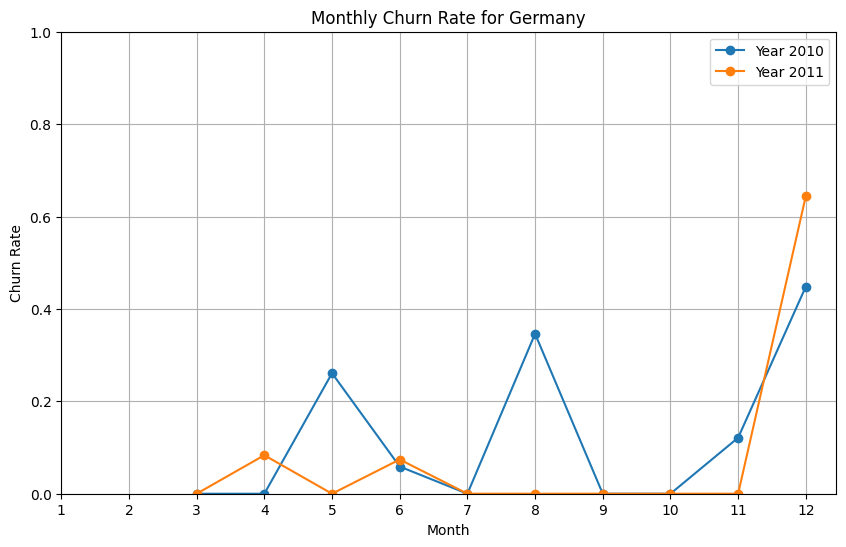

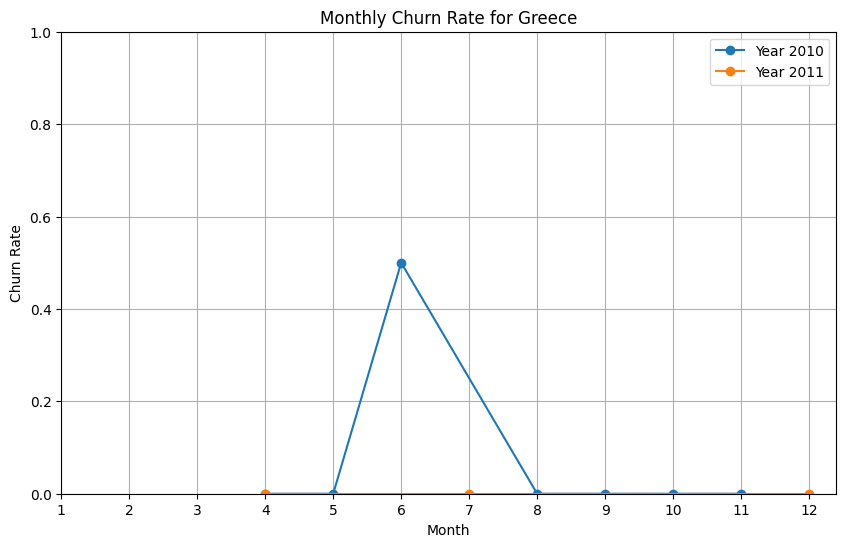

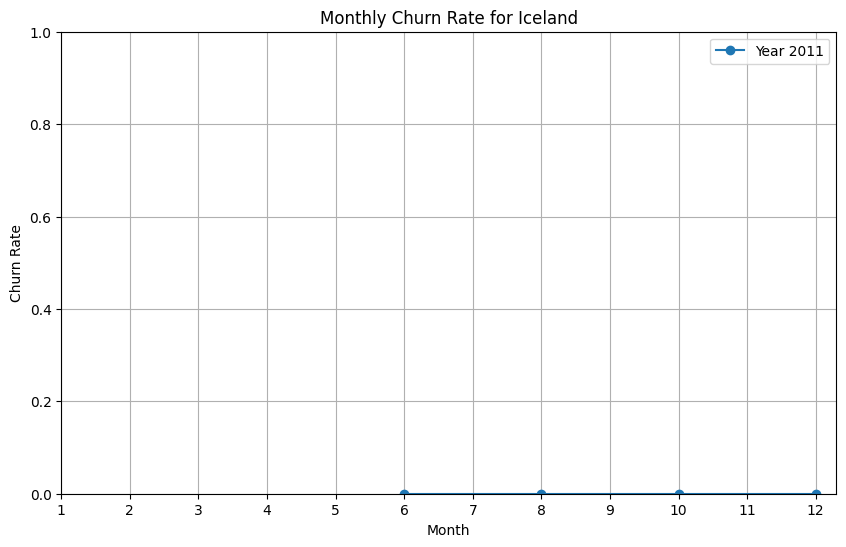

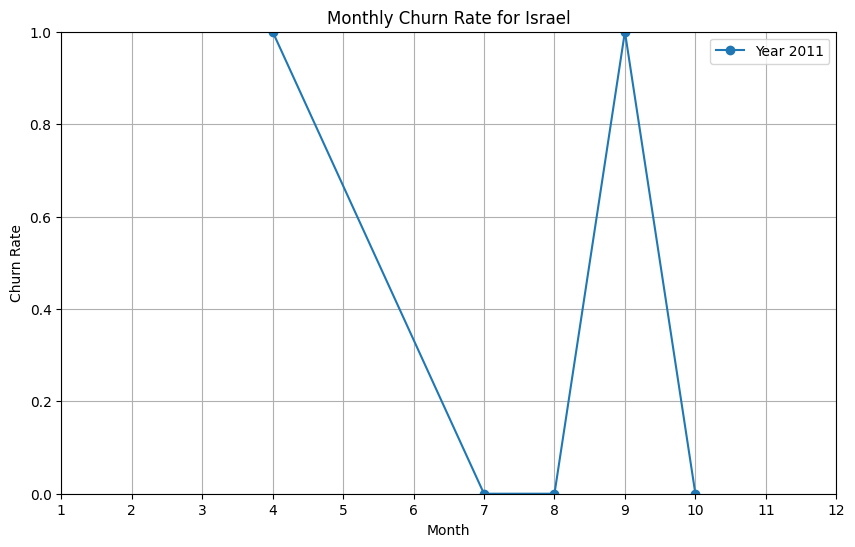

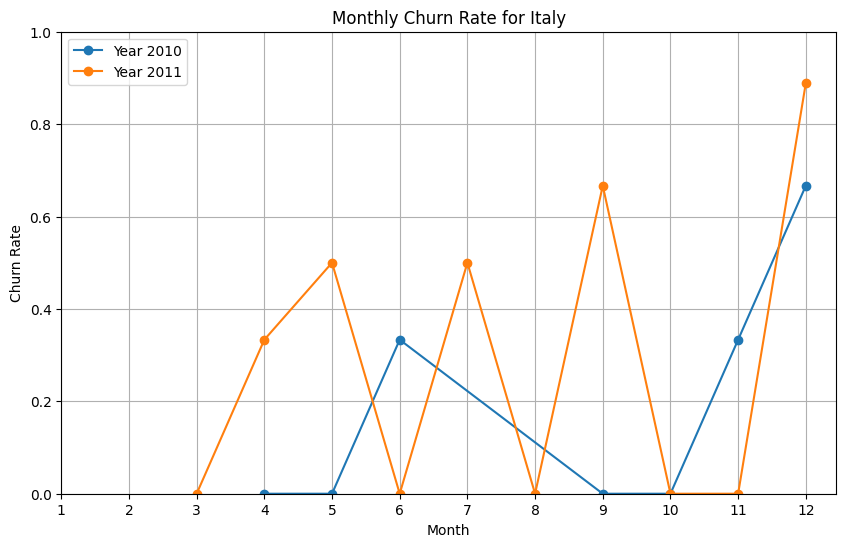

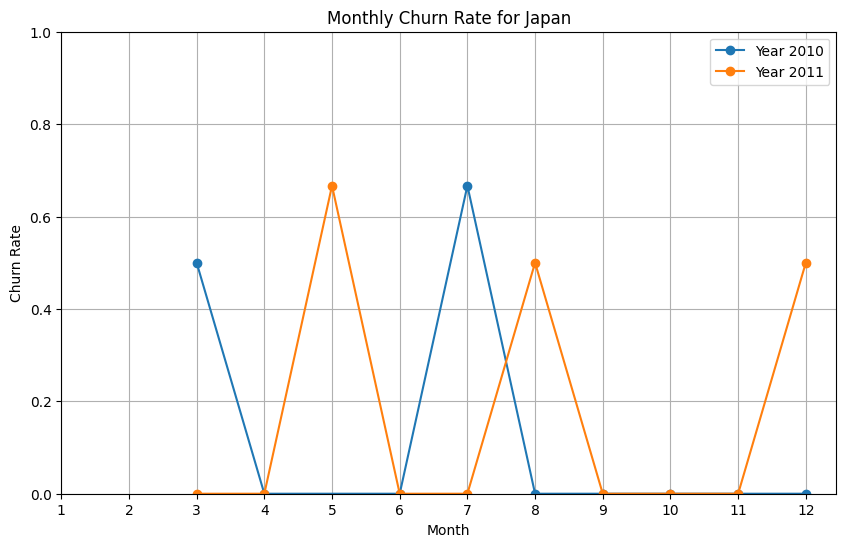

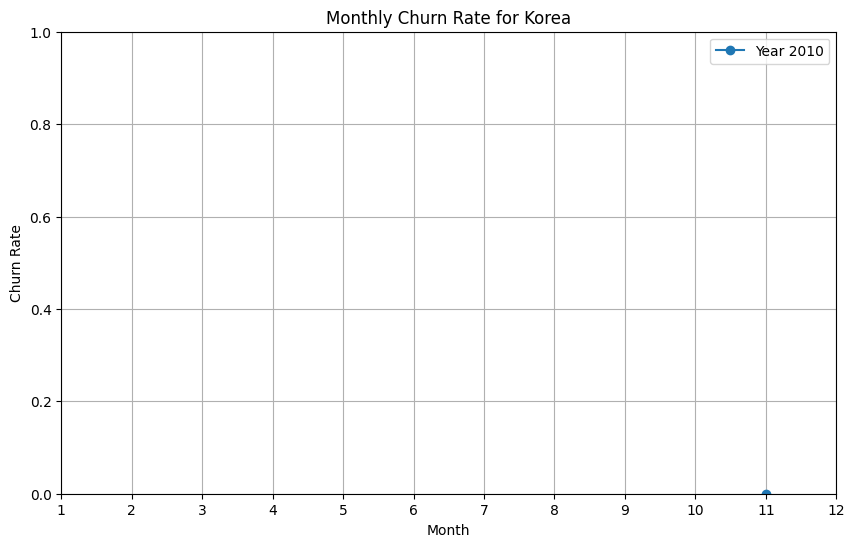

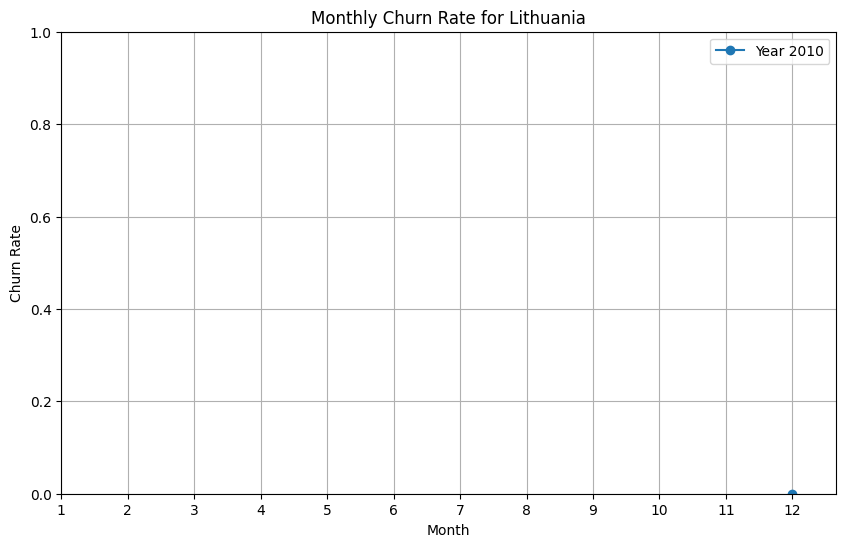

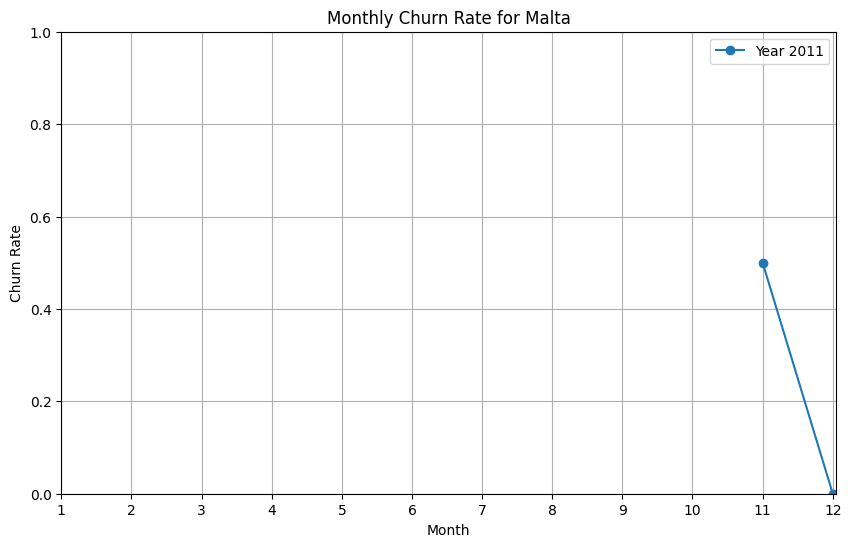

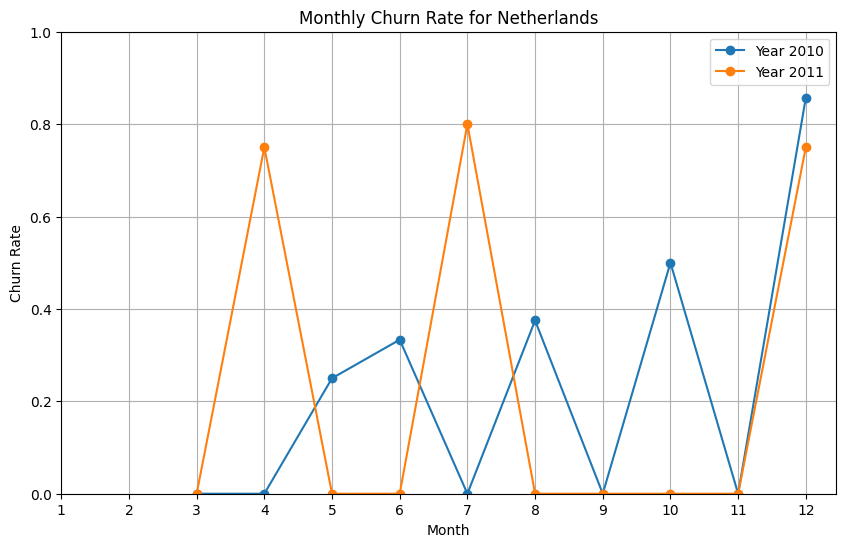

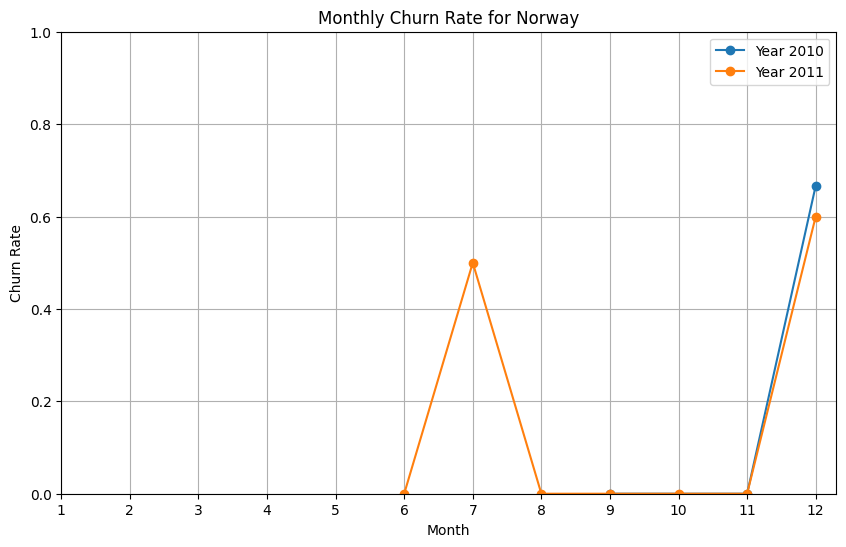

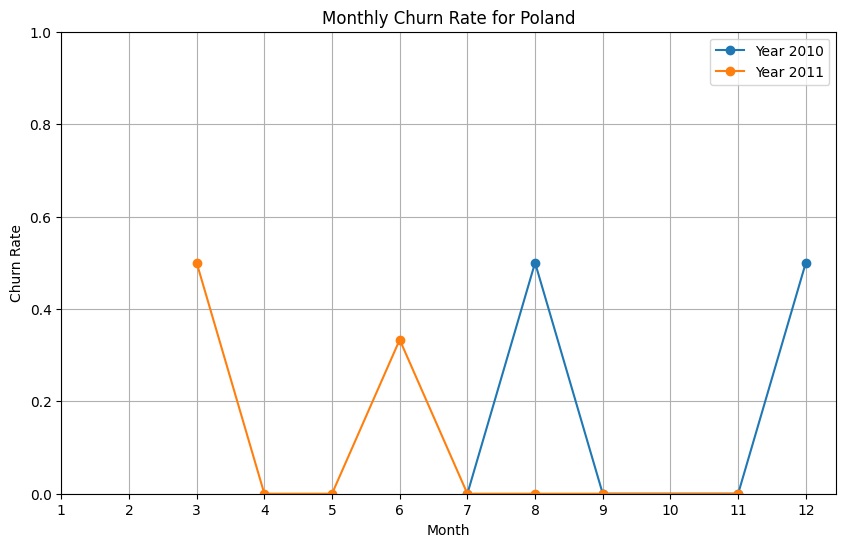

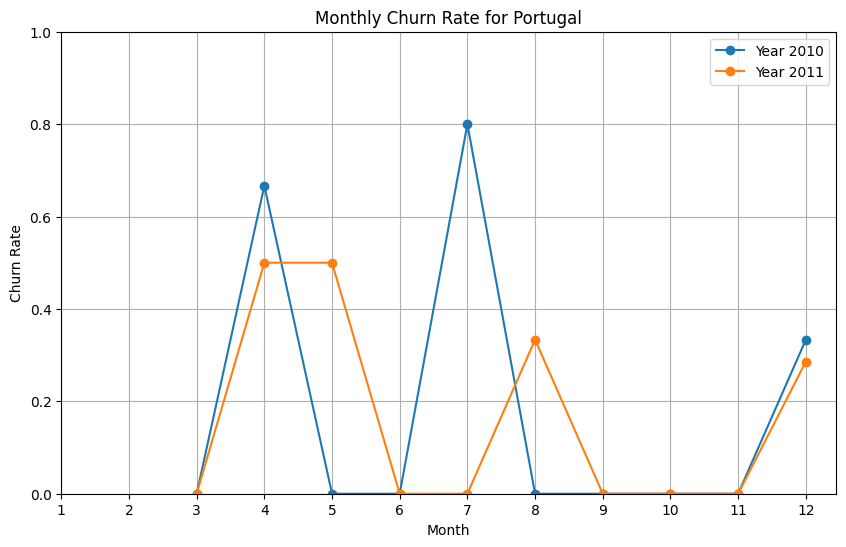

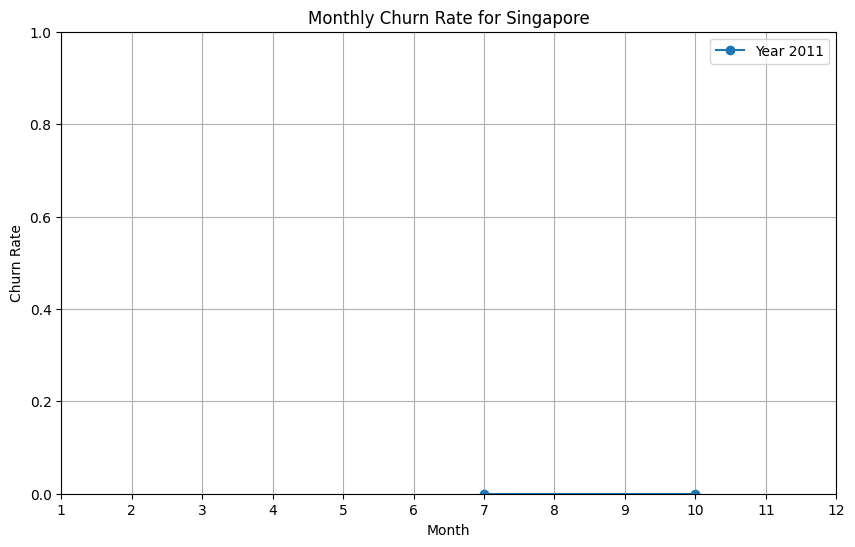

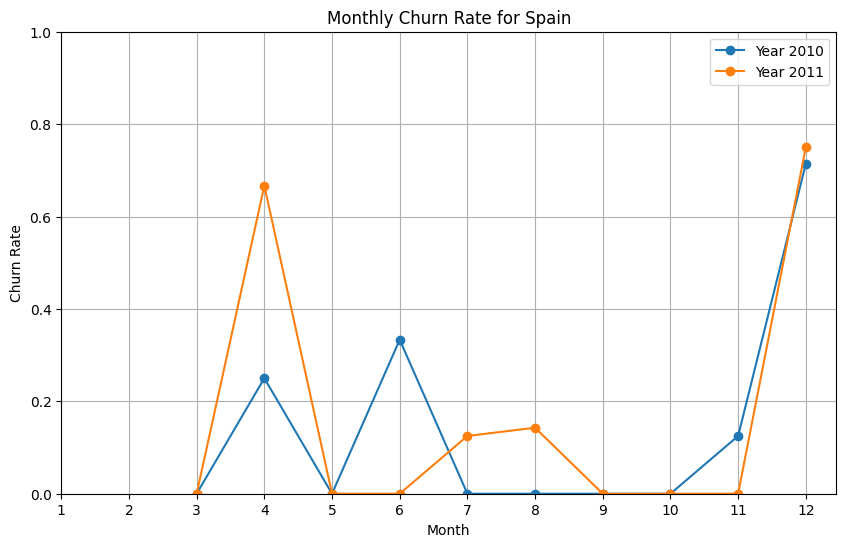

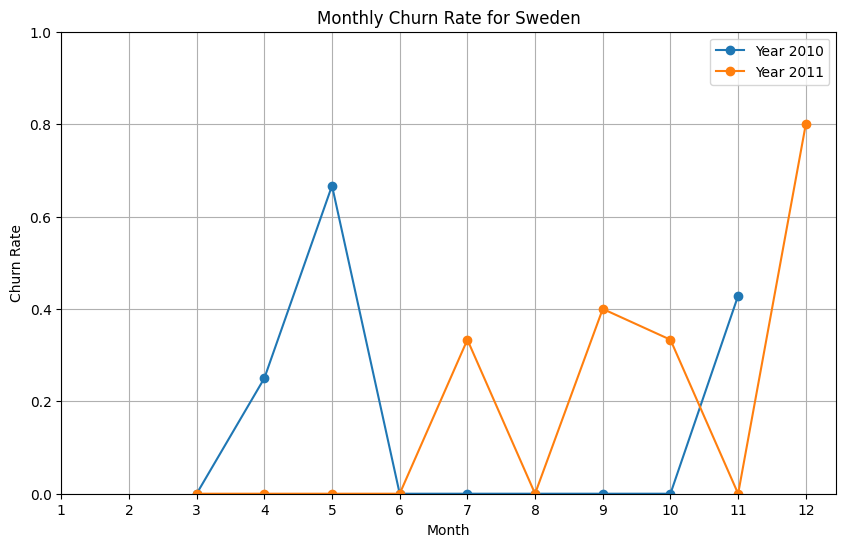

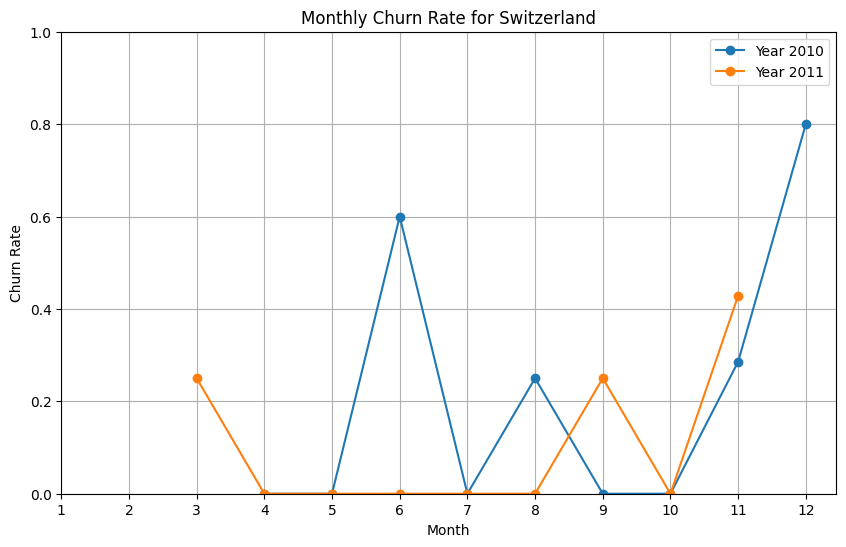

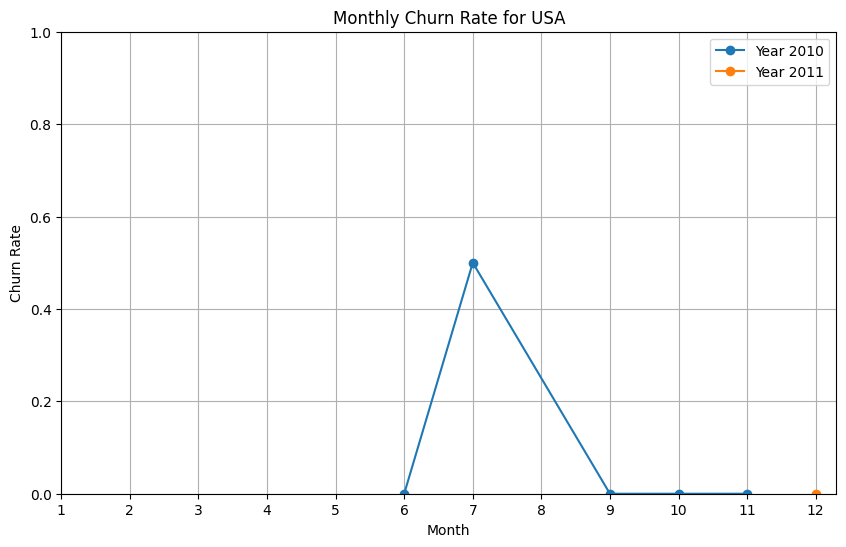

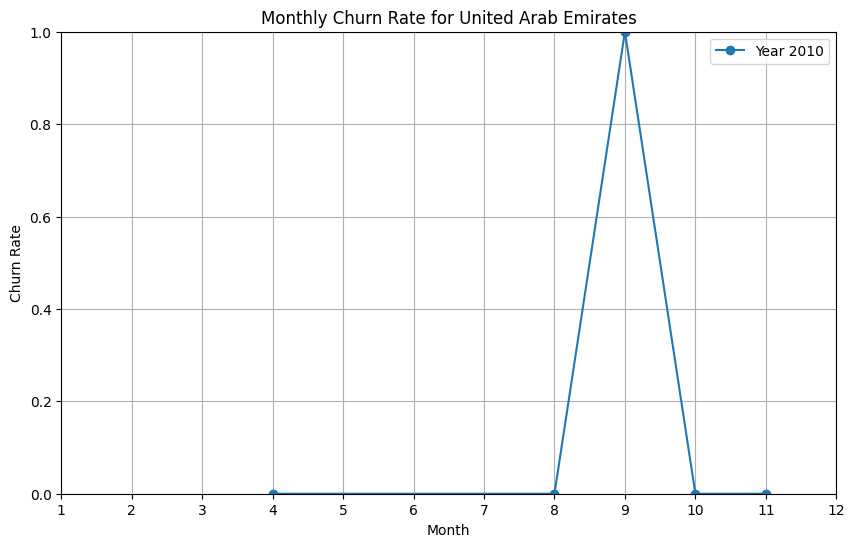

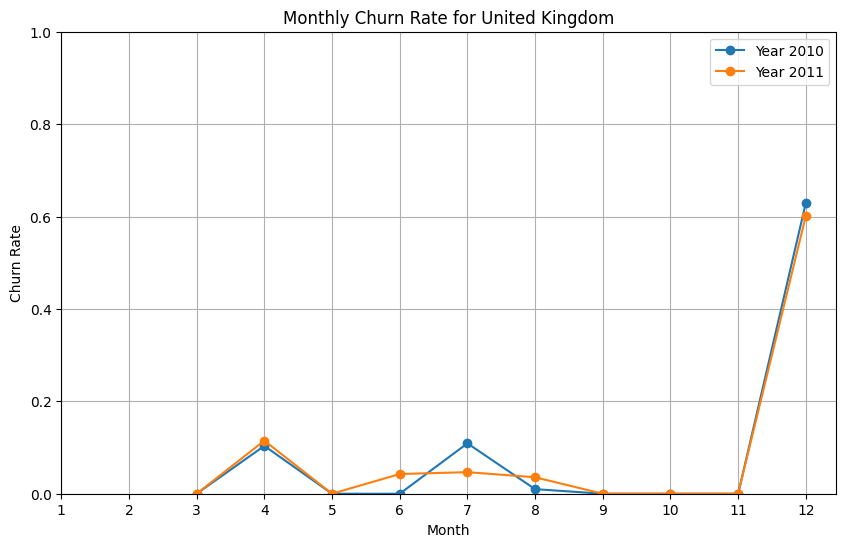

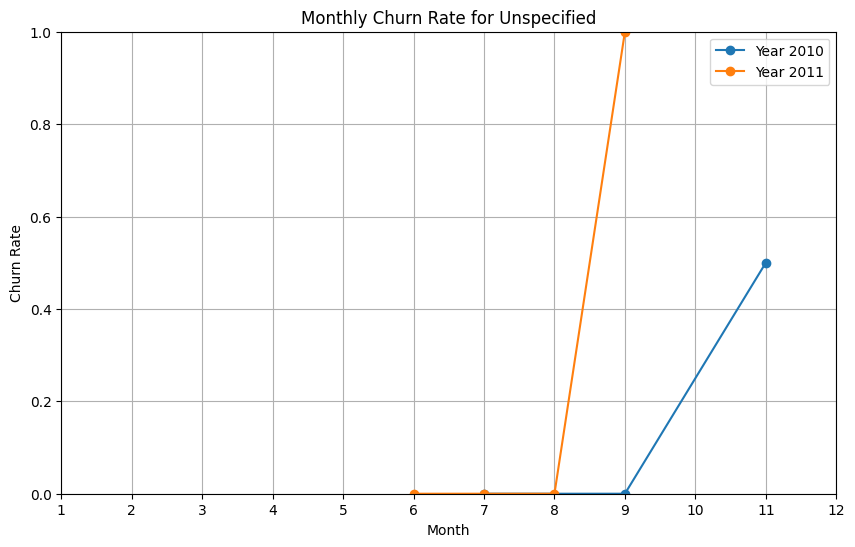

In [200]:
import pandas as pd
import matplotlib.pyplot as plt



combined_df = combined_df1[combined_df1['Year'].isin([2010, 2011])]
combined_df['Churn_Rate'] = combined_df['Churn_Rate'].apply(lambda x: max(0, x))


for country, data in combined_df.groupby('Country'):
    plt.figure(figsize=(10, 6))
    for year, year_data in data.groupby('Year'):
        plt.plot(year_data['Month'], year_data['Churn_Rate'], marker='o', linestyle='-', label=f'Year {year}')

    plt.title(f'Monthly Churn Rate for {country}')
    plt.xlabel('Month')
    plt.ylabel('Churn Rate')
    plt.grid(True)
    plt.xticks(range(1, 13))
    plt.legend()
    plt.ylim(0, 1)  # Set y-axis limit to ensure consistency
    plt.show()



In [201]:
data = pd.concat([sheet1_data,sheet2_data], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Feature Engineering**

In [203]:
data['TotalAmount'] = data['Quantity'] * data['Price']
features = data.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'Invoice': 'nunique',
    'TotalAmount': 'sum',
    'InvoiceDate': lambda x: (pd.Timestamp.now() - x.max()).days,
}).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:


# Calculate features
features = data.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'StockCode': 'nunique',
    'Invoice': 'nunique',
    'Price': 'sum',
    'InvoiceDate': lambda x: (pd.Timestamp.now() - x.max()).days
}).reset_index()


frequency = data.groupby('Customer ID')['InvoiceDate'].nunique().reset_index()
frequency.columns = ['Customer ID', 'Frequency']

# Merge the frequency feature with other features
features = pd.merge(features, frequency, on='Customer ID')
features.columns = ['Customer ID', 'TotalQuantity', 'UniqueItems', 'TotalInvoices', 'TotalAmount', 'Recency', 'Frequency']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [205]:
churn_threshold = 5000  # Defining a threshold to determine churn of customers. We select an approach where if customer doesnt buy anything after churn threshold will be cinsidered as likely to be churned
features['Churn'] = (features['Recency'] > churn_threshold).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer ID,TotalQuantity,UniqueItems,TotalInvoices,TotalAmount,Recency,Frequency,Churn
0,12346.0,52,30,17,580.44,4866,17,0
1,12347.0,3286,126,8,644.16,4543,8,0
2,12348.0,2714,25,5,193.10,4616,5,0
3,12349.0,1619,139,5,1504.59,4559,5,0
4,12350.0,197,17,1,65.30,4851,1,0
...,...,...,...,...,...,...,...,...
5937,18283.0,1733,352,22,1719.75,4544,22,0
5938,18284.0,493,28,2,116.09,4970,2,0
5939,18285.0,145,12,1,100.20,5201,1,1
5940,18286.0,592,67,3,306.55,5017,3,1


#**Building the model**

In [207]:
from sklearn.model_selection import train_test_split
X = features.drop('Churn', axis=1)  # Features (excluding the Churn column)
y = features['Churn']

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(random_state=42)

#**Predicting the results**

In [208]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy on Test Set:", accuracy)

Model Accuracy on Test Set: 1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:
data = {
  'Actual Churn': y_test,
  'Predicted Churn': y_pred
}

# Combine data into a DataFrame
combined_df = pd.DataFrame(data)

# Print the combined DataFrame
print(combined_df)


      Actual Churn  Predicted Churn
4766             1                1
2131             0                0
1400             0                0
5183             1                1
2827             0                0
...            ...              ...
3787             0                0
4256             0                0
1879             0                0
4181             0                0
1157             0                0

[1783 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Thus here we can select customers who are probable to get churned and devise strategies for customer retention.